<a href="https://colab.research.google.com/github/MHMotamedi97/On-Sensor-Data-Filtering/blob/main/On_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://zenodo.org/records/7331128/files/positive-charge.tar.gz?download=1

--2025-08-24 12:51:28--  https://zenodo.org/records/7331128/files/positive-charge.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7158280939 (6.7G) [application/octet-stream]
Saving to: ‘positive-charge.tar.gz?download=1’

positive-charge.tar 100%[===================>]   6.67G  21.7MB/s    in 5m 34s  

2025-08-24 12:57:03 (20.4 MB/s) - ‘positive-charge.tar.gz?download=1’ saved [7158280939/7158280939]



In [ ]:
!tar -tvf positive-charge.tar.gz > file_list.txt


^C


In [ ]:
!tar -xvf positive-charge.tar.gz?download=1


In [ ]:
!tar -zxvf positive-charge.tar.gz?download=1 positive-charge/recon8t_d16501.csv


positive-charge/recon8t_d16501.csv


In [ ]:
!tar -zxvf positive-charge.tar.gz?download=1 positive-charge/labels_d16501.csv

positive-charge/labels_d16501.csv


# Initial Analysis

In [ ]:
import pandas as pd
data = pd.read_csv('positive-charge/recon8t_d16501.csv')
data.head()


0    1    2    3    4    5    6    7    8    9  ...  2174  2175  2176  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   2177  2178  2179  2180  2181  2182  2183  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2184 columns]

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)


https://docs.google.com/spreadsheets/d/1W0O18dacQ7v46-yaVOLdJWp5IWOoqoZWp3s9Lv4uuh4#gid=0


APIError: APIError: [400]: This action would increase the number of cells in the workbook above the limit of 10000000 cells.

In [ ]:
for i in range(2183+1):
  print(data[data[f'{i}']!=0][f'{i}'])


Streaming output truncated to the last 5000 lines.
8607      29.9
8837     -55.0
9061      -0.3
9074      -4.4
9320     -39.0
10733     -8.6
11000    -16.9
11235   -185.9
11362     -3.7
11983    -27.3
12080    -75.9
Name: 1825, dtype: float64
2757     -0.1
3337     -3.0
3995     -0.9
7517     -2.4
7662    -11.5
8127     -1.9
8607     -0.8
8837     -2.3
11235   -46.2
11983    -9.9
12080   -13.5
Name: 1826, dtype: float64
6778   -2.1
Name: 1827, dtype: float64
87        -3.5
357       -0.1
1520      -0.2
3058      -2.3
3601      -9.7
5010      -1.5
6778    2917.5
7660      -0.1
9412      -0.1
9864     -40.8
Name: 1828, dtype: float64
87        -61.1
357        -0.6
381        -0.3
760        -0.7
1053       -2.2
1206       -2.5
1520       -2.8
2426       -2.4
3058      -15.9
3601      -51.7
4305      -25.0
5010       -9.9
5503       -0.4
5665     -156.6
6778     2961.4
7660       -0.2
9046       -0.4
9412       -0.1
9662     -109.0
9807      -16.5
9864     -148.5
10737      -0.1
Name: 18

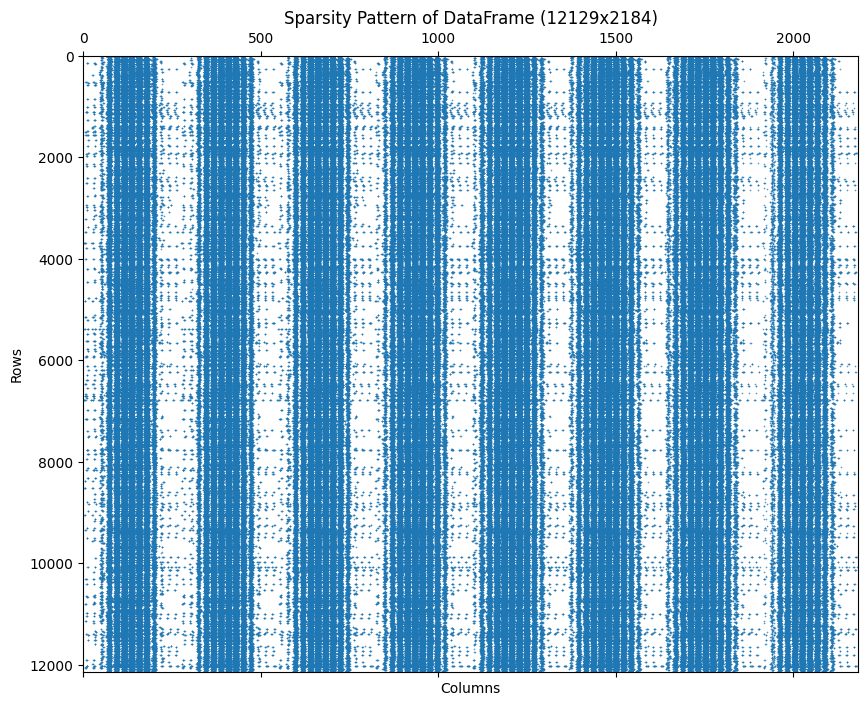

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix


# Convert DataFrame to sparse and plot sparsity
plt.figure(figsize=(10, 8))
plt.spy(data, markersize=0.2, aspect='auto')
plt.title(f"Sparsity Pattern of DataFrame ({data.shape[0]}x{data.shape[1]})")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


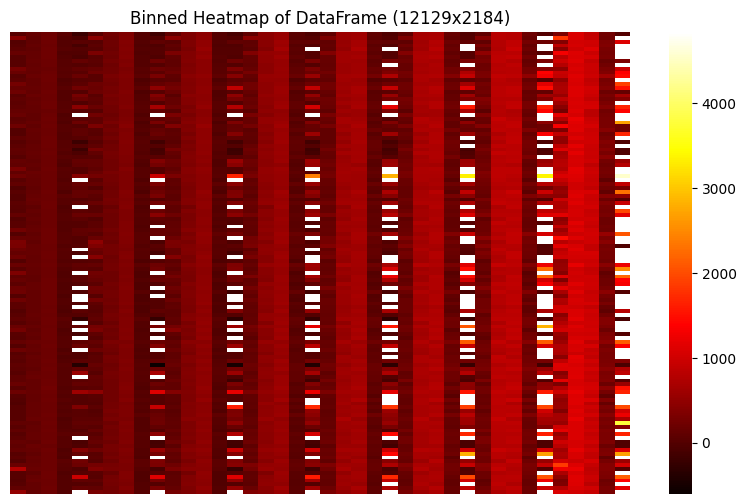

In [ ]:
import seaborn as sns
from scipy.stats import binned_statistic_2d

# Get nonzero indices and values
rows, cols = data.to_numpy().nonzero()
values = data.to_numpy()[rows, cols]

# Define bin size
bins_x = 120
bins_y = 40

# Aggregate values
heatmap, xedges, yedges, _ = binned_statistic_2d(rows, cols, values, statistic='mean', bins=[bins_x, bins_y])

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, cmap="hot", xticklabels=False, yticklabels=False)
plt.title(f"Binned Heatmap of DataFrame ({data.shape[0]}x{data.shape[1]})")
plt.show()


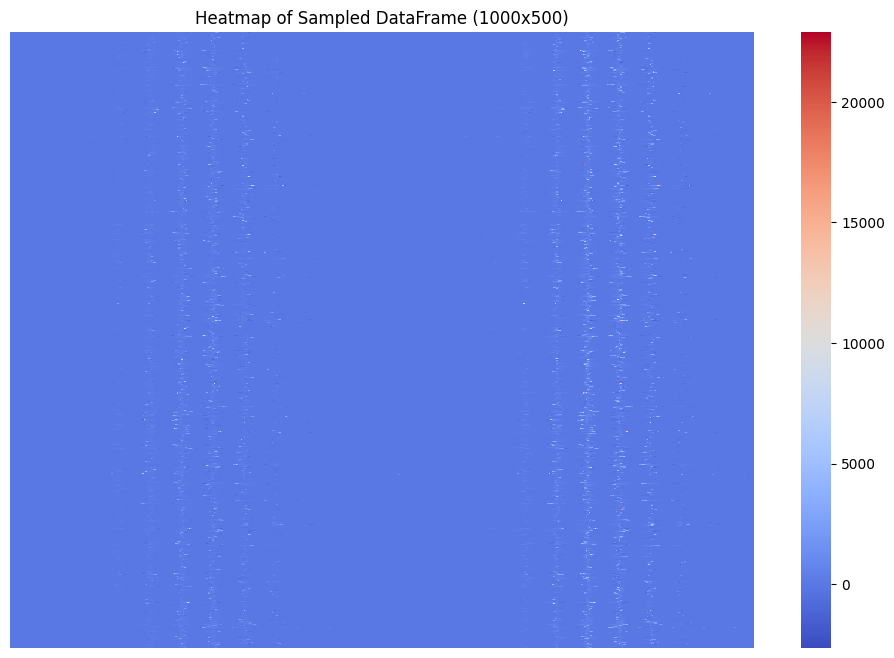

In [ ]:
df_sample = data.iloc[:1000, :500]

plt.figure(figsize=(12, 8))
sns.heatmap(df_sample, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("Heatmap of Sampled DataFrame (1000x500)")
plt.show()


In [ ]:
# prompt: reshape row of data to a matrix with (8,13,21)

import numpy as np

# Assuming 'data' is your DataFrame and you want to reshape the first row
row_data = data.iloc[2].values  # Get the first row as a NumPy array

# Reshape the row data into a 3D matrix (8, 13, 21)
# If the row data doesn't have enough elements for the target shape,
# you might need to pad it with zeros or handle the error appropriately.
reshaped_data = np.resize(row_data, (8, 13, 21))

print(reshaped_data.shape)
reshaped_data


(8, 13, 21)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

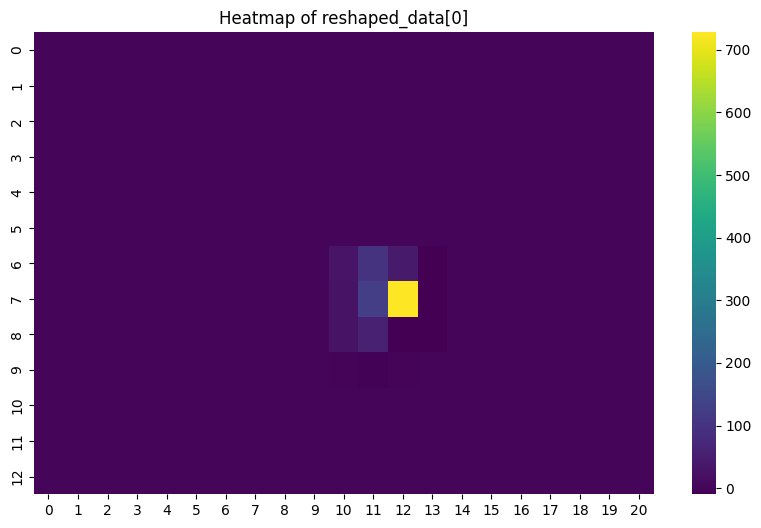

In [ ]:
# prompt: generate a heat map for reshaped_data[0]

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming reshaped_data[0] is a 2D array (13, 21)
plt.figure(figsize=(10, 6))
sns.heatmap(reshaped_data[0], cmap="viridis", annot=False) # annot=True to show values
plt.title("Heatmap of reshaped_data[0]")
plt.show()


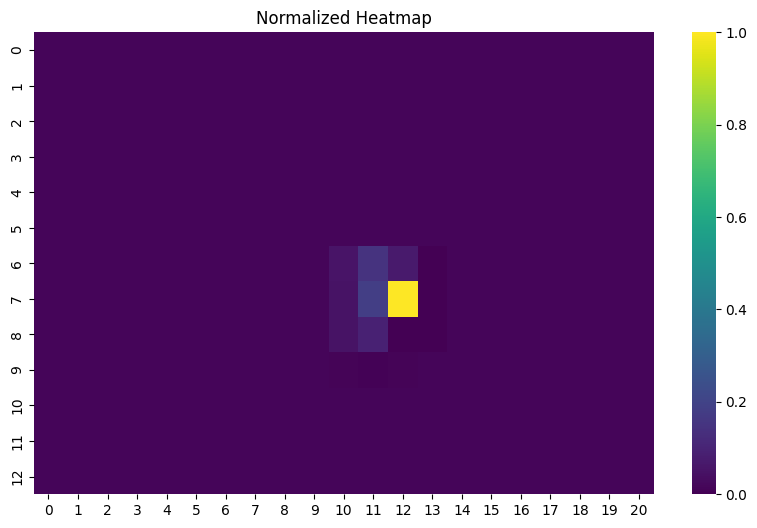

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_normalized_heatmap(data_2d):
    """
    Plots a heatmap of a 2D array after normalizing the data.

    Args:
        data_2d: A 2D numpy array.
    """
    # Normalize the data
    normalized_data = (data_2d - np.min(data_2d)) / (np.max(data_2d) - np.min(data_2d))

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(normalized_data, cmap="viridis", annot=False)  # annot=True to show values
    plt.title("Normalized Heatmap")
    plt.show()

plot_normalized_heatmap(reshaped_data[0])

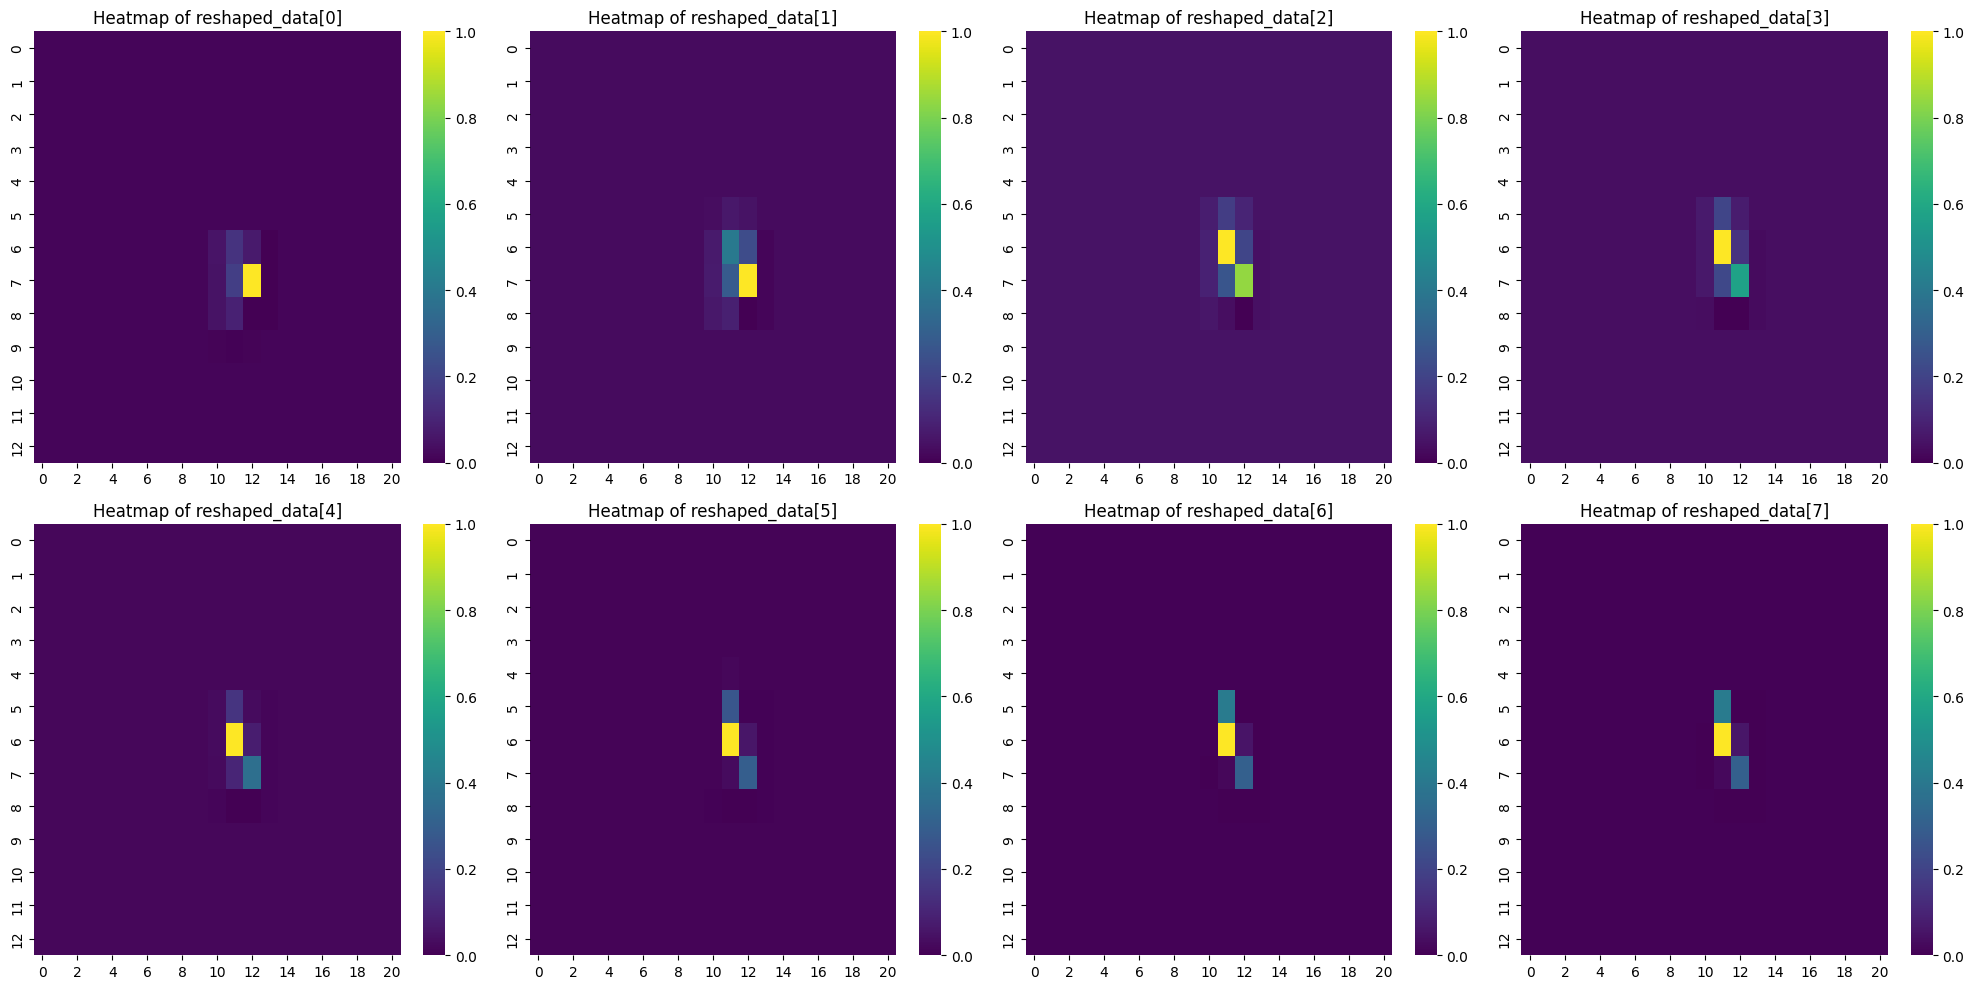

In [ ]:
# prompt: I want to draw multiple heatmap for reshaped_data[0], reshaped_data[1], ... , reshaped_data[7]

# Assuming reshaped_data is already defined as in the previous code

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Iterate through the reshaped data and plot heatmaps
for i in range(8):
  row = i // 4
  col = i % 4
  data_2d = reshaped_data[i]
  normalized_data = (data_2d - np.min(data_2d)) / (np.max(data_2d) - np.min(data_2d))
  sns.heatmap(normalized_data, cmap="viridis", ax=axes[row, col], annot=False) # annot=True to show values
  axes[row, col].set_title(f"Heatmap of reshaped_data[{i}]")

# Adjust layout and display
plt.tight_layout()
plt.show()


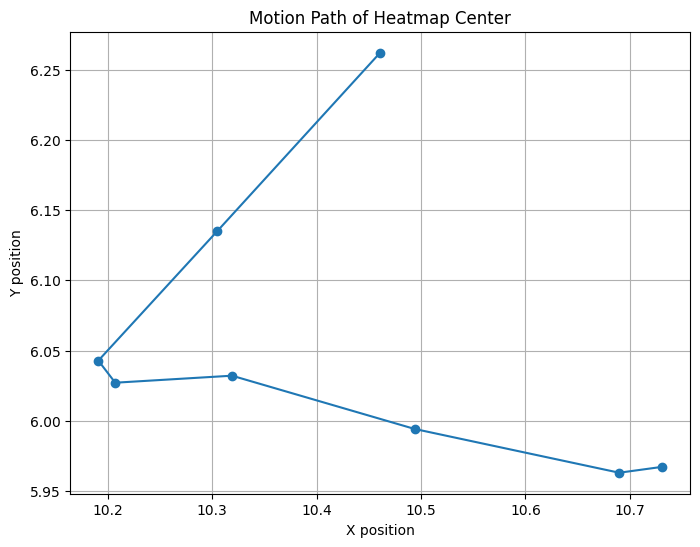

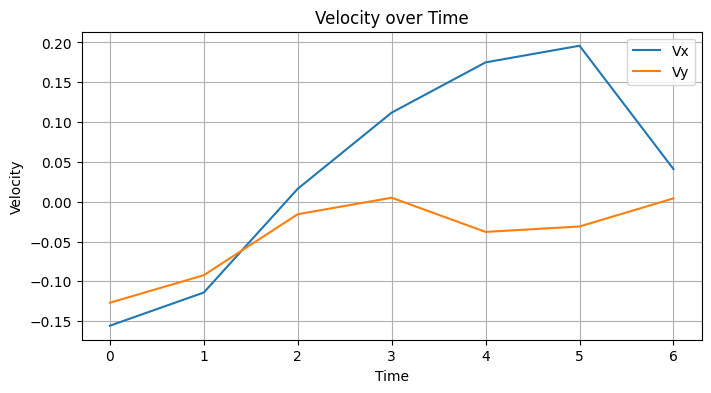

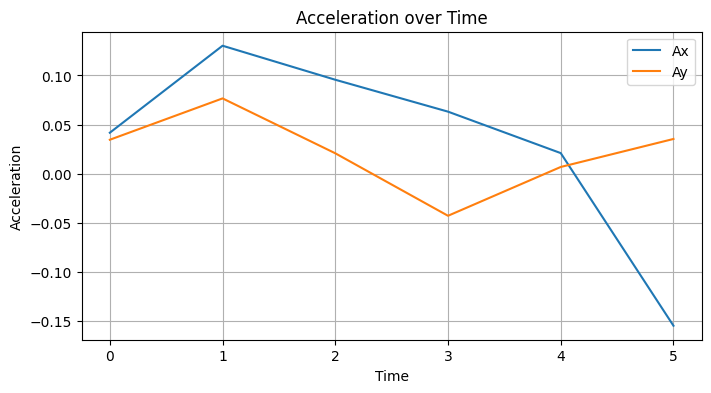

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def normalize(data):
    """Normalize data to the range [0,1]"""
    return (data - np.min(data)) / (np.max(data) - np.min(data)) if np.max(data) != np.min(data) else data

def center_of_mass(heatmap):
    """Compute the center of mass of a normalized heatmap."""
    heatmap = normalize(heatmap)  # Apply the same normalization used in plotting
    x_indices, y_indices = np.meshgrid(np.arange(heatmap.shape[1]), np.arange(heatmap.shape[0]))
    total_intensity = np.sum(heatmap)
    if total_intensity == 0:
        return None  # Avoid division by zero
    x_c = np.sum(x_indices * heatmap) / total_intensity
    y_c = np.sum(y_indices * heatmap) / total_intensity
    return x_c, y_c

# Assuming `reshaped_data` is a list of 2D arrays representing heatmaps over time
num_frames = len(reshaped_data)
centers = [center_of_mass(reshaped_data[i]) for i in range(num_frames)]
centers = np.array([c for c in centers if c is not None])  # Remove any None values

# Compute velocity
velocity = np.diff(centers, axis=0)

# Compute acceleration
acceleration = np.diff(velocity, axis=0)

# Plot trajectory
plt.figure(figsize=(8,6))
plt.plot(centers[:, 0], centers[:, 1], marker='o', linestyle='-')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Motion Path of Heatmap Center')
plt.grid()
plt.show()

# Plot velocity over time
plt.figure(figsize=(8,4))
plt.plot(velocity[:, 0], label='Vx')
plt.plot(velocity[:, 1], label='Vy')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity over Time')
plt.legend()
plt.grid()
plt.show()

# Plot acceleration over time
plt.figure(figsize=(8,4))
plt.plot(acceleration[:, 0], label='Ax')
plt.plot(acceleration[:, 1], label='Ay')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration over Time')
plt.legend()
plt.grid()
plt.show()


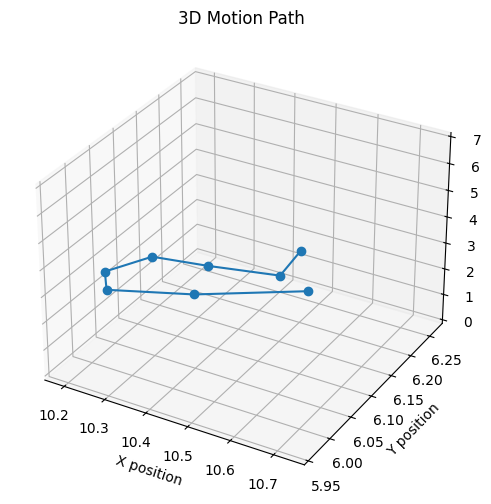

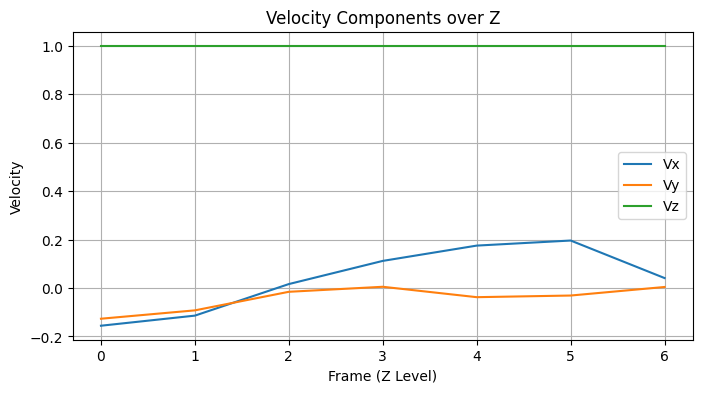

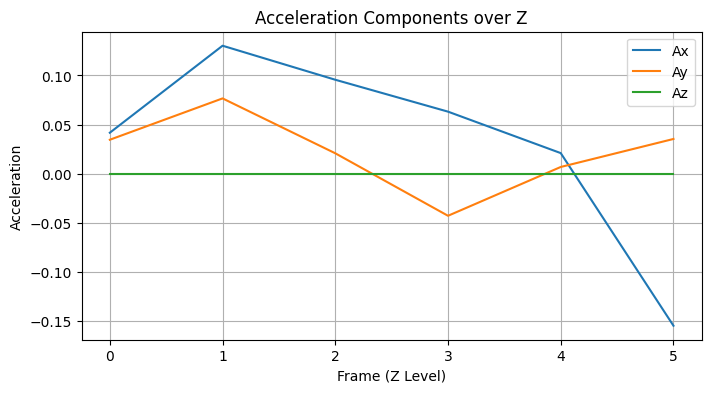

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def normalize(data):
    """Normalize data to the range [0,1]."""
    return (data - np.min(data)) / (np.max(data) - np.min(data)) if np.max(data) != np.min(data) else data

def center_of_mass(heatmap):
    """Compute the center of mass of a normalized heatmap in the X-Y plane."""
    heatmap = normalize(heatmap)
    x_indices, y_indices = np.meshgrid(np.arange(heatmap.shape[1]), np.arange(heatmap.shape[0]))
    total_intensity = np.sum(heatmap)
    if total_intensity == 0:
        return None  # Avoid division by zero
    x_c = np.sum(x_indices * heatmap) / total_intensity
    y_c = np.sum(y_indices * heatmap) / total_intensity
    return x_c, y_c

# Assuming `reshaped_data` is a list of 2D arrays where index i corresponds to Z = i
num_frames = len(reshaped_data)
centers = [(center_of_mass(reshaped_data[i]), i) for i in range(num_frames)]  # (X, Y), Z
centers = [(c[0][0], c[0][1], c[1]) for c in centers if c[0] is not None]  # Convert to (X, Y, Z)
centers = np.array(centers)  # Convert list to numpy array

# Compute 3D velocity
velocity = np.diff(centers, axis=0)

# Compute 3D acceleration
acceleration = np.diff(velocity, axis=0)

# Plot 3D motion trajectory
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(centers[:, 0], centers[:, 1], centers[:, 2], marker='o', linestyle='-')
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_zlabel('Z position')
ax.set_title('3D Motion Path')
plt.show()

# Plot velocity over time
plt.figure(figsize=(8,4))
plt.plot(velocity[:, 0], label='Vx')
plt.plot(velocity[:, 1], label='Vy')
plt.plot(velocity[:, 2], label='Vz')
plt.xlabel('Frame (Z Level)')
plt.ylabel('Velocity')
plt.title('Velocity Components over Z')
plt.legend()
plt.grid()
plt.show()

# Plot acceleration over time
plt.figure(figsize=(8,4))
plt.plot(acceleration[:, 0], label='Ax')
plt.plot(acceleration[:, 1], label='Ay')
plt.plot(acceleration[:, 2], label='Az')
plt.xlabel('Frame (Z Level)')
plt.ylabel('Acceleration')
plt.title('Acceleration Components over Z')
plt.legend()
plt.grid()
plt.show()


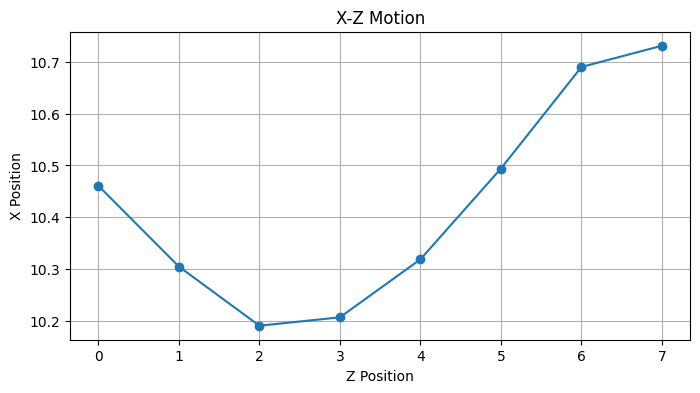

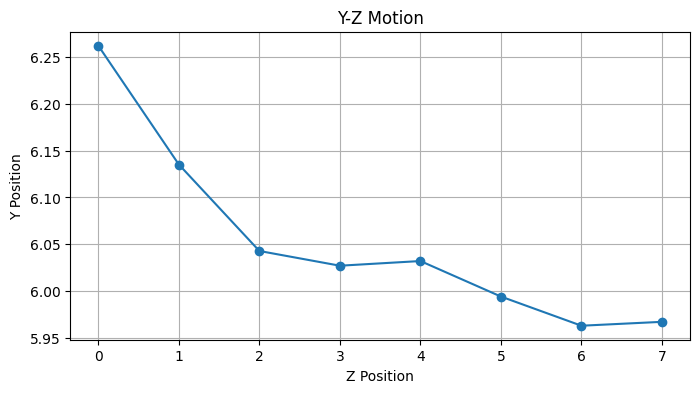

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(data):
    """Normalize data to the range [0,1]."""
    return (data - np.min(data)) / (np.max(data) - np.min(data)) if np.max(data) != np.min(data) else data

def center_of_mass(heatmap):
    """Compute the center of mass of a normalized heatmap in the X-Y plane."""
    heatmap = normalize(heatmap)
    x_indices, y_indices = np.meshgrid(np.arange(heatmap.shape[1]), np.arange(heatmap.shape[0]))
    total_intensity = np.sum(heatmap)
    if total_intensity == 0:
        return None  # Avoid division by zero
    x_c = np.sum(x_indices * heatmap) / total_intensity
    y_c = np.sum(y_indices * heatmap) / total_intensity
    return x_c, y_c

# Assuming `reshaped_data` is a list of 2D arrays where index i corresponds to Z = i
num_frames = len(reshaped_data)
centers = [(center_of_mass(reshaped_data[i]), i) for i in range(num_frames)]  # (X, Y), Z
centers = [(c[0][0], c[0][1], c[1]) for c in centers if c[0] is not None]  # Convert to (X, Y, Z)
centers = np.array(centers)  # Convert list to numpy array

# Plot X-Z motion
plt.figure(figsize=(8, 4))
plt.plot(centers[:, 2], centers[:, 0], marker='o', linestyle='-')
plt.xlabel('Z Position')
plt.ylabel('X Position')
plt.title('X-Z Motion')
plt.grid()
plt.show()

# Plot Y-Z motion
plt.figure(figsize=(8, 4))
plt.plot(centers[:, 2], centers[:, 1], marker='o', linestyle='-')
plt.xlabel('Z Position')
plt.ylabel('Y Position')
plt.title('Y-Z Motion')
plt.grid()
plt.show()


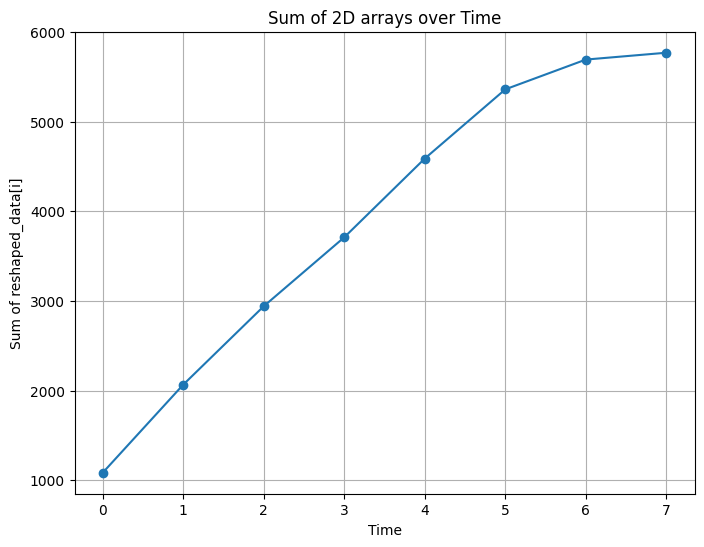

In [ ]:
# prompt:  I want to calculate sum of reshaped_data[0], reshaped_data[1], ... , reshaped_data[7] and plot them vs time.

# Calculate the sum of each 2D array in reshaped_data
sums = [np.sum(reshaped_data[i]) for i in range(8)]

# Assuming you have a time array corresponding to each 2D array
# Replace this with your actual time data if available
time = np.arange(8)

# Plot the sums vs time
plt.figure(figsize=(8, 6))
plt.plot(time, sums, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Sum of reshaped_data[i]')
plt.title('Sum of 2D arrays over Time')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Create a figure and axes for the subplots
# Increased the number of rows to 100 to accommodate 1000 plots
fig, axes = plt.subplots(10, 10, figsize=(20, 20))  # Adjust figsize as needed

# Assuming you have a time array corresponding to each 2D array
# Replace this with your actual time data if available
time = np.arange(8)

# Iterate through the first 100 rows of data
for i in range(100):
    row_data = data.iloc[i].values
    reshaped_data = np.resize(row_data, (8, 13, 21))

    # Calculate row and column indices for the subplot grid
    # Swapped row and column calculation to match the new grid dimensions
    row = i // 10 #changed to 100
    col = i % 10 #changed to 10

    # Calculate the sum of each 2D array in reshaped_data for the current row
    sums = [np.sum(reshaped_data[j]) for j in range(8)]

    # Plot the sums vs time on the corresponding subplot
    axes[row, col].plot(time, sums, marker='o', linestyle='-')
    axes[row, col].set_title(f"Row {i}")  # Add a title to each subplot


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile('data.zip', 'w', compression=zipfile.ZIP_DEFLATED) as z:
   with z.open('data.csv', 'w') as f:
    data.to_csv(f, index=False)

# New Version of Data

In [ ]:
!wget https://zenodo.org/records/10783560/files/labels.tar.gz?download=1

--2025-03-03 13:41:50--  https://zenodo.org/records/10783560/files/labels.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 792160271 (755M) [application/octet-stream]
Saving to: ‘labels.tar.gz?download=1’

labels.tar.gz?downl 100%[===================>] 755.46M  5.37MB/s    in 5m 12s  

2025-03-03 13:47:03 (2.42 MB/s) - ‘labels.tar.gz?download=1’ saved [792160271/792160271]



In [ ]:
!wget https://zenodo.org/records/10783560/files/recon3D.tar.gz?download=1

--2025-03-03 08:12:10--  https://zenodo.org/records/10783560/files/recon3D.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15133236242 (14G) [application/octet-stream]
Saving to: ‘recon3D.tar.gz?download=1’

D.tar.gz?download=1  31%[=====>              ]   4.47G  3.99MB/s    eta 42m 15s

In [ ]:
!tar -tvf labels.tar.gz?download=1 > file_list.txt


In [ ]:
!tar -zxvf labels.tar.gz?download=1 labels/labels_d17400.parquet


labels/labels_d17400.parquet
^C


In [ ]:
df = pd.read_parquet("labels/labels_d17400.parquet")
df

x-entry    y-entry  z-entry       n_x       n_y       n_z  \
0       65.862671  -2.887392    100.0 -0.492530  0.060908 -0.451304   
1        8.425912 -14.240351    100.0  0.172356 -0.000206 -0.334268   
2      -35.676140   4.984206    100.0  0.210914  0.022109 -0.408583   
3       60.889740 -32.536762    100.0 -0.142523  0.076708 -0.251438   
4     -290.753784   8.949370    100.0  0.687867  0.014682 -0.156402   
...           ...        ...      ...       ...       ...       ...   
49990  230.206039  10.166790    100.0 -6.718107 -0.204819 -1.525300   
49991  342.072968  -7.189905    100.0 -2.481329  0.069875 -0.444066   
49992  206.811844  -2.182609    100.0 -2.055638 -0.027296 -0.422575   
49993  131.326706   0.769840    100.0 -3.037814  0.014296 -0.933804   
49994  180.288651  -6.322806    100.0 -2.856524  0.178379 -1.123545   

       number_eh_pairs   y-local        pt  cotAlpha   cotBeta  y-midplane  \
0              23772.0  4.987770  0.456747  1.091349 -0.134960    3.860609   
1              11940.0 -2.177710 -0.334011 -0.515622  0.000616  -14.271165   
2               8871.0 -0.070212 -0.409192 -0.516208 -0.054111    7.689776   
3               6810.0  6.679180 -0.262873  0.566832 -0.305077  -17.282902   
4              31766.0  5.279240  0.157269 -4.398070 -0.093873   13.643044   
...                ...       ...       ...       ...       ...         ...   
49990          47851.0 -3.324680  1.538300  4.404450  0.134281    3.452734   
49991          60527.0  7.484770  0.453829  5.587748 -0.157353    0.677732   
49992          45608.0 -3.267410 -0.421222  4.864552  0.064594   -5.412332   
49993          42934.0  1.579090  0.926079  3.253160 -0.015309    1.535311   
49994          19231.0  5.278930  1.131620  2.542421 -0.158764    1.615416   

       x-midplane  
0       11.295240  
1       34.207022  
2       -9.865717  
3       32.548161  
4      -70.850266  
...           ...  
49990    9.983558  
49991   62.685557  
49992  -36.415749  
49993  -31.331304  
49994   53.167619  

[49995 rows x 13 columns]

In [ ]:
df

x-entry    y-entry  z-entry       n_x       n_y       n_z  \
0       65.862671  -2.887392    100.0 -0.492530  0.060908 -0.451304   
1        8.425912 -14.240351    100.0  0.172356 -0.000206 -0.334268   
2      -35.676140   4.984206    100.0  0.210914  0.022109 -0.408583   
3       60.889740 -32.536762    100.0 -0.142523  0.076708 -0.251438   
4     -290.753784   8.949370    100.0  0.687867  0.014682 -0.156402   
...           ...        ...      ...       ...       ...       ...   
49990  230.206039  10.166790    100.0 -6.718107 -0.204819 -1.525300   
49991  342.072968  -7.189905    100.0 -2.481329  0.069875 -0.444066   
49992  206.811844  -2.182609    100.0 -2.055638 -0.027296 -0.422575   
49993  131.326706   0.769840    100.0 -3.037814  0.014296 -0.933804   
49994  180.288651  -6.322806    100.0 -2.856524  0.178379 -1.123545   

       number_eh_pairs   y-local        pt  cotAlpha   cotBeta  y-midplane  \
0              23772.0  4.987770  0.456747  1.091349 -0.134960    3.860609   
1              11940.0 -2.177710 -0.334011 -0.515622  0.000616  -14.271165   
2               8871.0 -0.070212 -0.409192 -0.516208 -0.054111    7.689776   
3               6810.0  6.679180 -0.262873  0.566832 -0.305077  -17.282902   
4              31766.0  5.279240  0.157269 -4.398070 -0.093873   13.643044   
...                ...       ...       ...       ...       ...         ...   
49990          47851.0 -3.324680  1.538300  4.404450  0.134281    3.452734   
49991          60527.0  7.484770  0.453829  5.587748 -0.157353    0.677732   
49992          45608.0 -3.267410 -0.421222  4.864552  0.064594   -5.412332   
49993          42934.0  1.579090  0.926079  3.253160 -0.015309    1.535311   
49994          19231.0  5.278930  1.131620  2.542421 -0.158764    1.615416   

       x-midplane  
0       11.295240  
1       34.207022  
2       -9.865717  
3       32.548161  
4      -70.850266  
...           ...  
49990    9.983558  
49991   62.685557  
49992  -36.415749  
49993  -31.331304  
49994   53.167619  

[49995 rows x 13 columns]

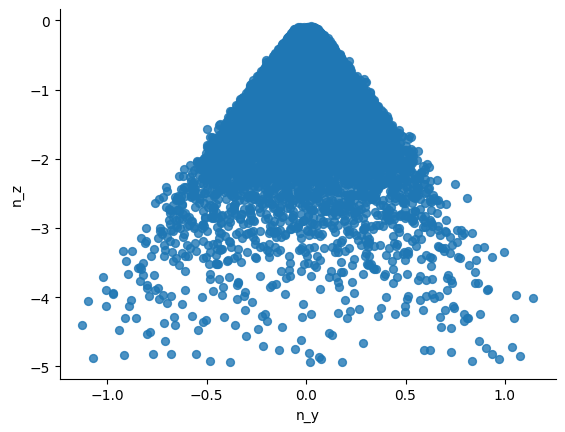

In [ ]:
# n_y vs n_z

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='n_y', y='n_z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# AI exploration of Data

In [ ]:
import pandas as pd

# Load the data from the specified CSV file into a DataFrame
data = pd.read_csv('/content/positive-charge/labels_d16501.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the columns and their data types
print("\nColumn information:")
display(data.info())

First 5 rows of the DataFrame:


'| x-entry   | y-entry   | z-entry   | n_x       | n_y       | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha   | cotBeta    | y-midplane   | x-midplane   |\n|:----------|:----------|:----------|:----------|:----------|:----------|:------------------|:----------|:---------|:-----------|:-----------|:-------------|:-------------|\n| 187.961   | 5.81938   | 100       | -3.20176  | -0.015797 | -0.738721 | 37967             | -0.96378  | 0.740845 | 4.33419    | 0.0213843  | 4.75017      | -28.7489     |\n| 9.40812   | 13.2009   | 100       | 0.826235  | 0.026282  | -1.37122  | 6538              | 0.884188  | 1.37205  | -0.602557  | -0.0191669 | 14.1593      | 39.536       |\n| 84.7328   | 10.7212   | 100       | -0.306291 | 0.083919  | -0.791659 | 5891              | 4.28515   | 0.795417 | 0.386898   | -0.106004  | 16.0214      | 65.3879      |\n| -256.3    | -5.27536  | 100       | 7.12505   | 0.304351  | -1.8344   | 28788             | 5.46693   | 1.85853  | -3.88413   |


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12129 entries, 0 to 12128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x-entry          12129 non-null  float64
 1   y-entry          12129 non-null  float64
 2   z-entry          12129 non-null  float64
 3   n_x              12129 non-null  float64
 4   n_y              12129 non-null  float64
 5   n_z              12129 non-null  float64
 6   number_eh_pairs  12129 non-null  float64
 7   y-local          12129 non-null  float64
 8   pt               12129 non-null  float64
 9   cotAlpha         12129 non-null  float64
 10  cotBeta          12129 non-null  float64
 11  y-midplane       12129 non-null  float64
 12  x-midplane       12129 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


None

In [ ]:
import os
import pandas as pd

# Directory containing the extracted CSV files
data_dir = 'positive-charge'

# List all CSV files in the directory
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
csv_files = csv_files[:5]
# Read and concatenate all CSV files into a single DataFrame
all_data = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

# Display the first 5 rows of the combined DataFrame
print("First 5 rows of the combined DataFrame:")
display(all_data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the columns and their data types for the combined DataFrame
print("\nColumn information for the combined DataFrame:")
display(all_data.info())

# Display descriptive statistics for the combined DataFrame
print("\nDescriptive statistics for the combined DataFrame:")
display(all_data.describe().to_markdown(numalign="left", stralign="left"))

First 5 rows of the combined DataFrame:


'| x-entry   | y-entry   | z-entry   | n_x       | n_y       | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha   | cotBeta    | y-midplane   | x-midplane   |\n|:----------|:----------|:----------|:----------|:----------|:----------|:------------------|:----------|:---------|:-----------|:-----------|:-------------|:-------------|\n| 130.114   | -0.589047 | 100       | -1.60783  | 0.009555  | -0.434336 | 68301             | 1.96564   | 0.432848 | 3.70181    | -0.0219991 | 0.510908     | -54.9763     |\n| 40.4522   | 12.7567   | 100       | -0.698959 | -0.020225 | -0.837415 | 13152             | 0.12886   | 0.837201 | 0.834663   | 0.0241517  | 11.5491      | -1.28096     |\n| 100.115   | 3.09195   | 100       | -2.45766  | -0.174669 | -1.19235  | 18774             | -4.25226  | 1.20766  | 2.06119    | 0.146491   | -4.2326      | -2.94476     |\n| 68.6335   | 11.2952   | 100       | -0.219946 | -0.333418 | -1.51201  | 10866             | -6.42363  | 1.54897  | 0.145466   |


Column information for the combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112584 entries, 0 to 112583
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   x-entry          112584 non-null  float64
 1   y-entry          112584 non-null  float64
 2   z-entry          112584 non-null  float64
 3   n_x              112584 non-null  float64
 4   n_y              112584 non-null  float64
 5   n_z              112584 non-null  float64
 6   number_eh_pairs  112584 non-null  float64
 7   y-local          112584 non-null  float64
 8   pt               112584 non-null  float64
 9   cotAlpha         112584 non-null  float64
 10  cotBeta          112584 non-null  float64
 11  y-midplane       112584 non-null  float64
 12  x-midplane       112584 non-null  float64
dtypes: float64(13)
memory usage: 11.2 MB


None


Descriptive statistics for the combined DataFrame:


'|       | x-entry   | y-entry   | z-entry   | n_x        | n_y        | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha   | cotBeta    | y-midplane   | x-midplane   |\n|:------|:----------|:----------|:----------|:-----------|:-----------|:----------|:------------------|:----------|:---------|:-----------|:-----------|:-------------|:-------------|\n| count | 112584    | 112584    | 112584    | 112584     | 112584     | 112584    | 112584            | 112584    | 112584   | 112584     | 112584     | 112584       | 112584       |\n| mean  | 4.88583   | 1.70141   | 100       | -0.0787344 | -0.0172463 | -0.928402 | 22536.2           | 0.0369054 | 0.938628 | 0.104163   | 0.0327193  | 0.0654454    | -0.322324    |\n| std   | 149.936   | 13.179    | 0         | 3.26754    | 0.168348   | 0.671327  | 16947.4           | 4.57078   | 0.67835  | 2.87183    | 0.150372   | 10.8245      | 43.3633      |\n| min   | -469.943  | -32.8314  | 100       | -35.3523   | -1.28697   | -5.0098

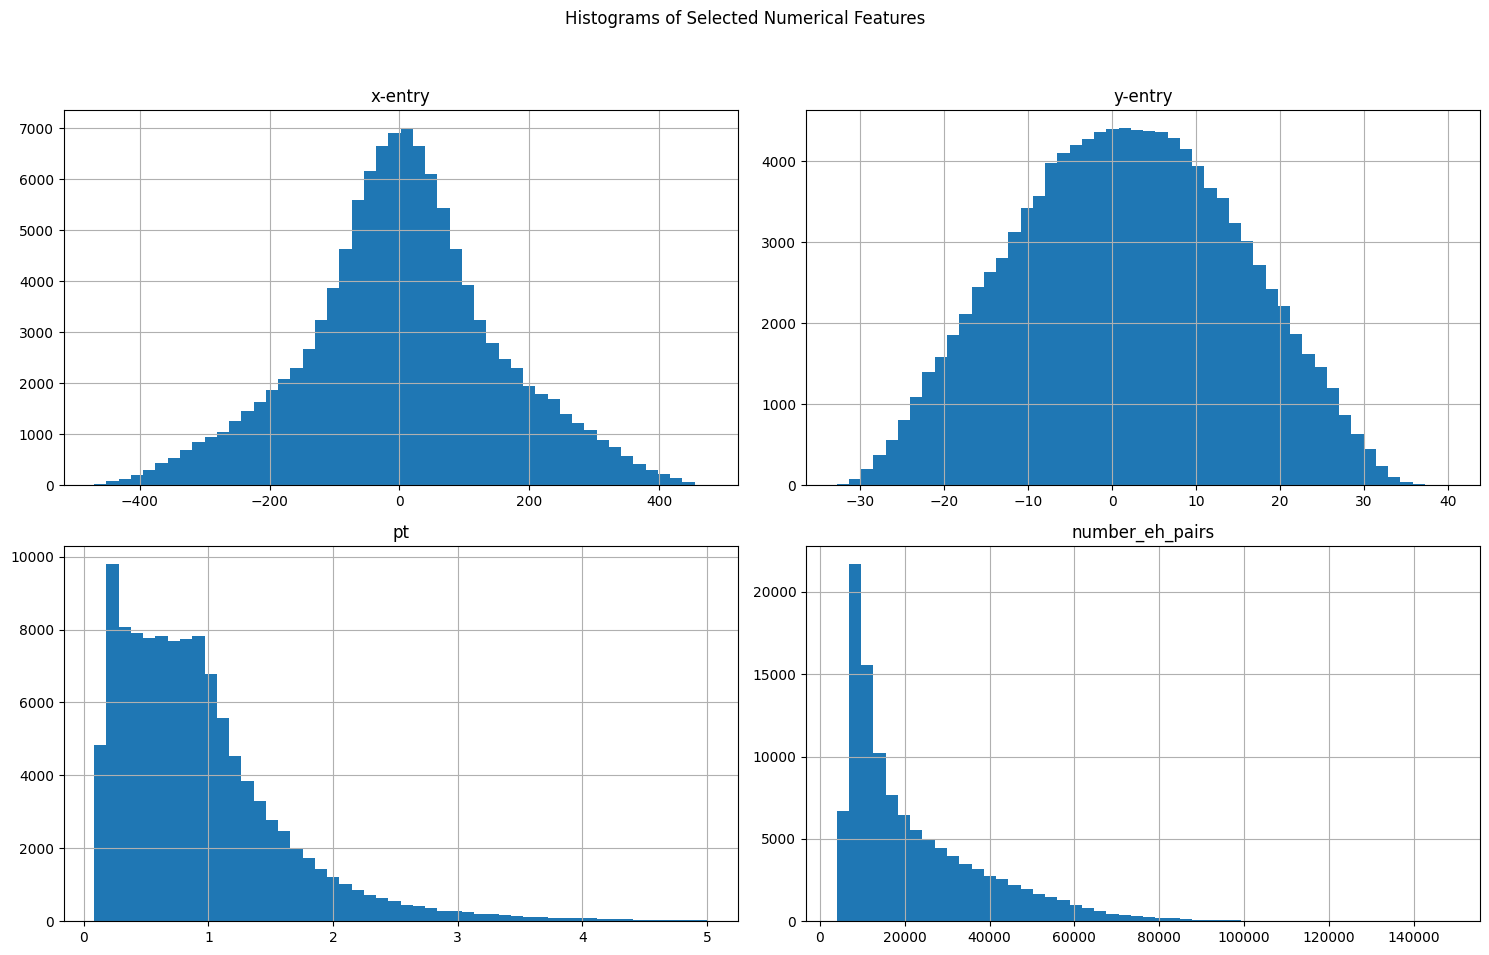

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for selected numerical features
numerical_cols = ['x-entry', 'y-entry', 'pt', 'number_eh_pairs']
all_data[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Selected Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

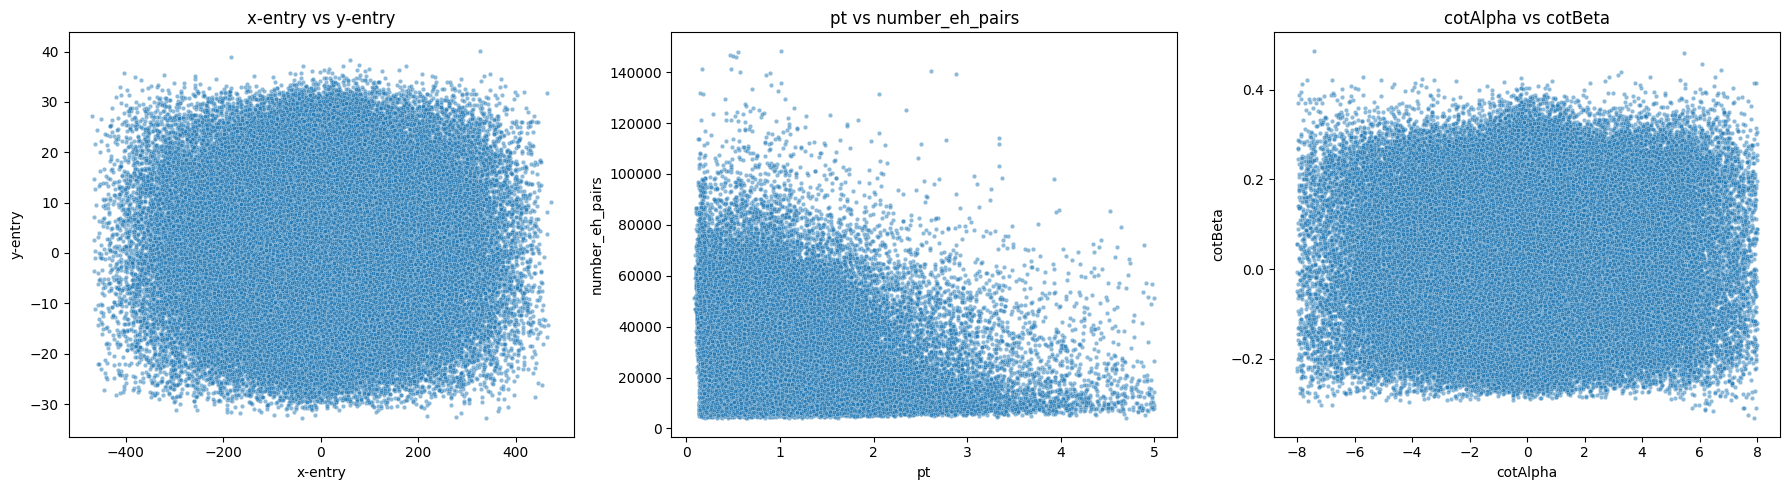

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for selected pairs of variables
scatter_pairs = [('x-entry', 'y-entry'), ('pt', 'number_eh_pairs'), ('cotAlpha', 'cotBeta')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(scatter_pairs):
    sns.scatterplot(data=all_data, x=x_col, y=y_col, ax=axes[i], alpha=0.5, s=10)
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

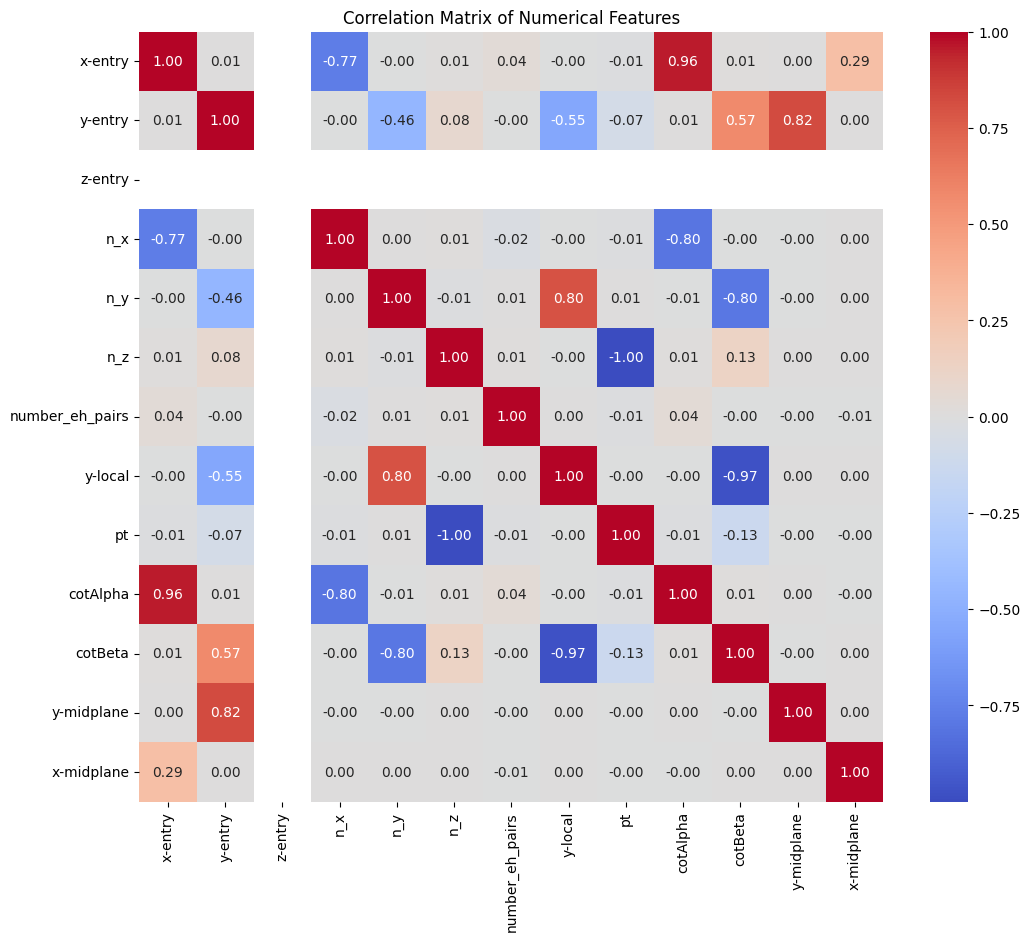

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = all_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Task
Analyze the dataset "/content/positive-charge/labels_d16501.csv" from the URL "https://zenodo.org/records/7331128" extensively, including visualizing distributions and investigating relationships between variables. Then, explain how to feed this data to an SNN network, including data preprocessing, SNN framework selection, SNN model definition, training/simulation, and evaluation.

## Data preprocessing

### Subtask:
Prepare the data for an SNN by considering appropriate encoding schemes for the input features.


**Reasoning**:
Identify the columns to be used as input features, determine an appropriate encoding scheme for SNNs, and apply the encoding to a sample of the data. Given the nature of the data (continuous numerical values), rate coding is a suitable encoding scheme for SNNs. This involves converting the numerical values into firing rates of neurons, which can then be represented as spike trains.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Identify the columns to be used as input features
# Exclude 'z-entry' as it has a constant value and 'number_eh_pairs' as it's the target variable
input_features = ['x-entry', 'y-entry', 'n_x', 'n_y', 'n_z', 'y-local', 'pt', 'cotAlpha', 'cotBeta', 'y-midplane', 'x-midplane']
input_data = all_data[input_features]

# 2. Determine an appropriate encoding scheme - using Rate Coding
# Normalize the data to a range suitable for firing rates (e.g., 0 to 100 Hz)
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_input_data = scaler.fit_transform(input_data)

# 3. Apply the chosen encoding scheme
# For demonstration, we will represent the firing rates directly.
# In a real SNN implementation, these rates would be used to generate spike trains.
# We'll just show the scaled data as the encoded representation.
encoded_data = scaled_input_data

print("Shape of original input data:", input_data.shape)
print("Shape of encoded input data (rate coded):", encoded_data.shape)
print("\nFirst 5 rows of encoded data:")
display(pd.DataFrame(encoded_data, columns=input_features).head().to_markdown(index=False, numalign="left", stralign="left"))


Shape of original input data: (112584, 11)
Shape of encoded input data (rate coded): (112584, 11)

First 5 rows of encoded data:


'| x-entry   | y-entry   | n_x     | n_y     | n_z     | y-local   | pt      | cotAlpha   | cotBeta   | y-midplane   | x-midplane   |\n|:----------|:----------|:--------|:--------|:--------|:----------|:--------|:-----------|:----------|:-------------|:-------------|\n| 63.6023   | 44.1693   | 46.7685 | 50.4232 | 92.8402 | 61.7412   | 7.09462 | 73.1326    | 37.8911   | 51.3622      | 13.3481      |\n| 54.0987   | 62.4518   | 48.0282 | 49.265  | 84.6615 | 50.436    | 15.3232 | 55.2104    | 43.5245   | 80.7977      | 49.1459      |\n| 60.4225   | 49.2119   | 45.5907 | 43.2585 | 77.4596 | 23.4707   | 22.8621 | 62.8773    | 58.4576   | 38.7128      | 48.0367      |\n| 57.0857   | 60.4496   | 48.6921 | 37.0846 | 70.9736 | 10.1061   | 29.8077 | 50.9023    | 67.493    | 50.7185      | 90.9077      |\n| 43.9507   | 17.0494   | 49.2177 | 51.9875 | 86.4362 | 63.6768   | 13.5895 | 48.6652    | 32.4744   | 4.48734      | 20.2203      |'

**Reasoning**:
The data has been encoded using rate coding. To further prepare the data for an SNN, it is beneficial to visualize the distribution of the encoded features to ensure the scaling is appropriate and to identify any potential issues before feeding it to an SNN model.



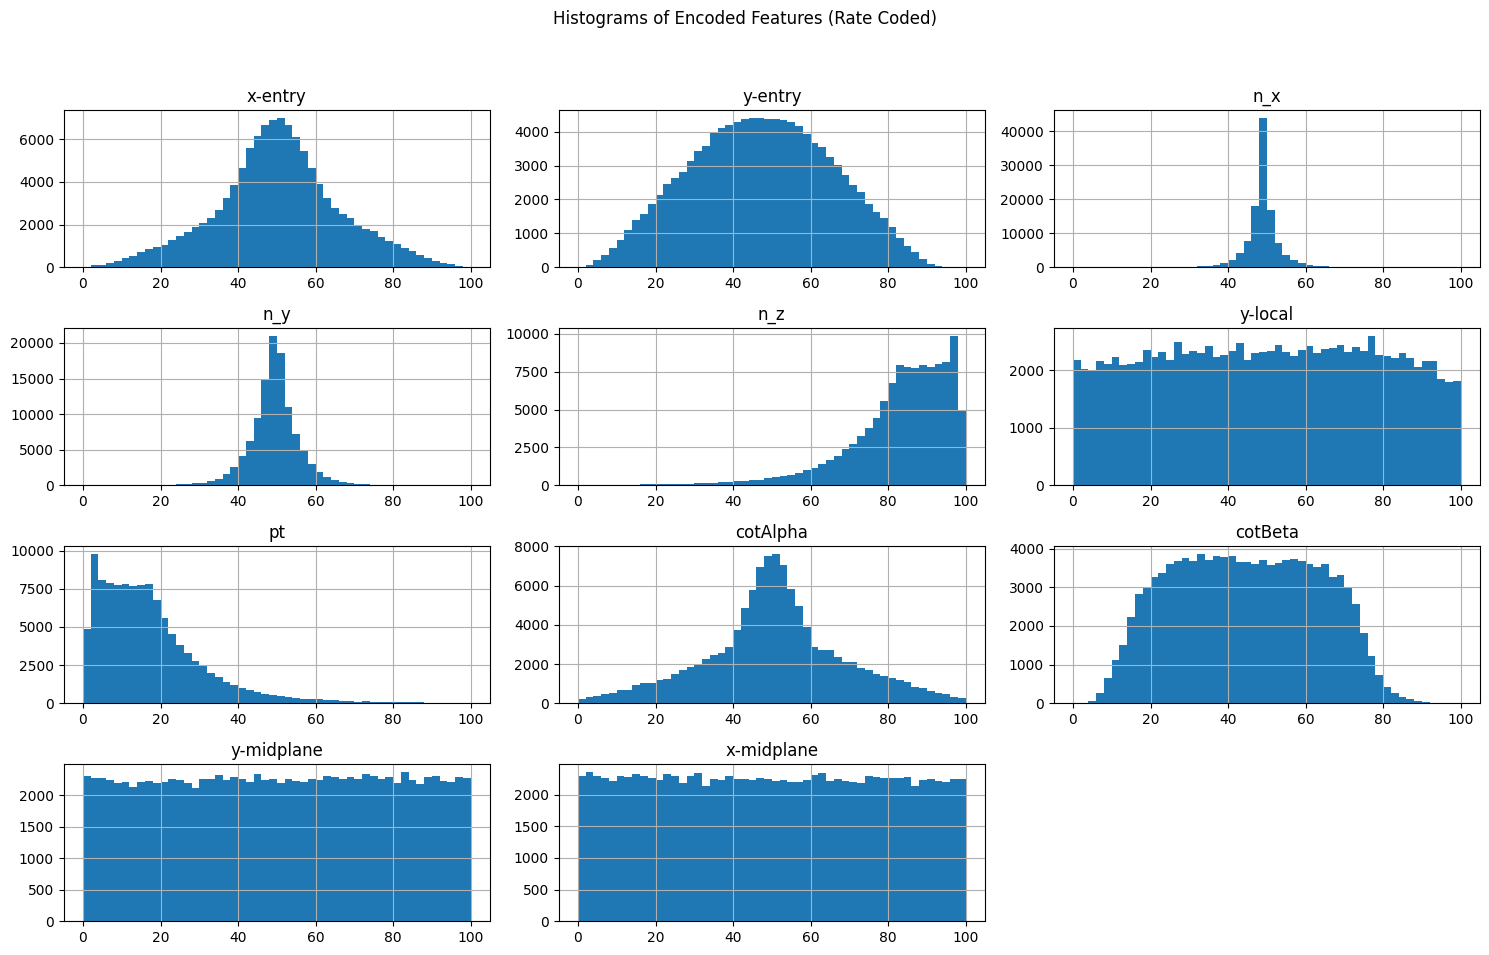

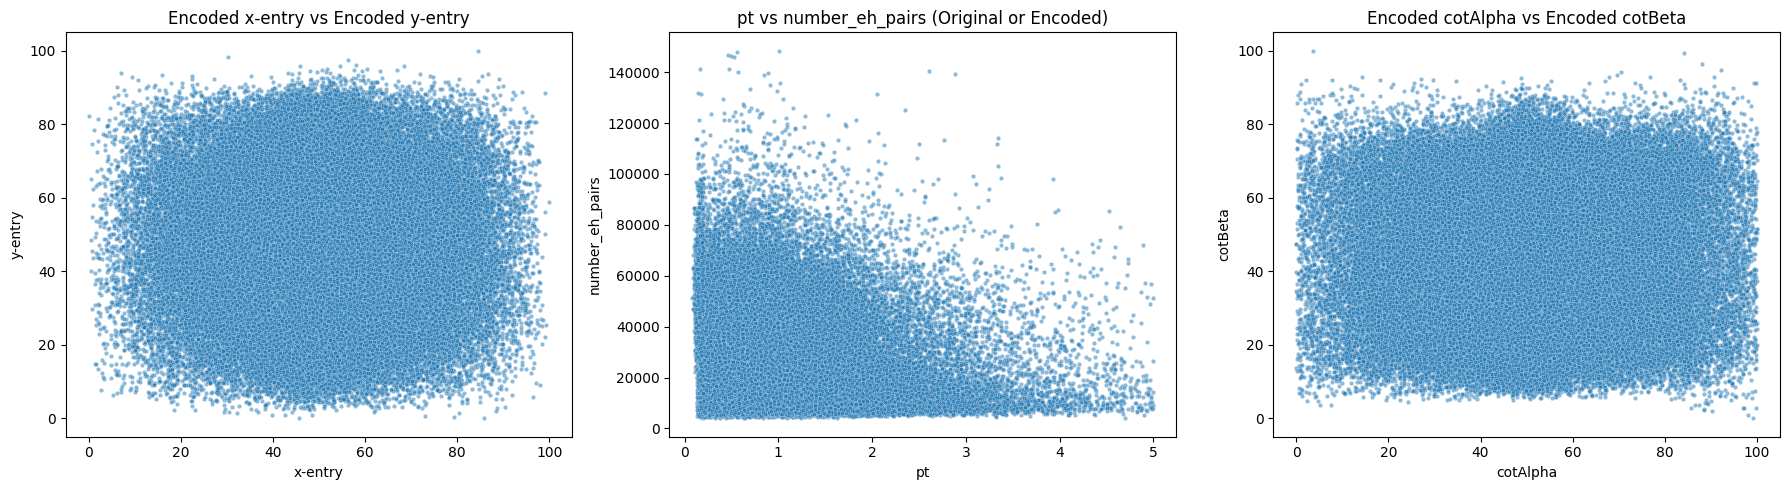

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert encoded_data back to a DataFrame for easier plotting with seaborn
encoded_df = pd.DataFrame(encoded_data, columns=input_features)

# Plot histograms of the encoded features
encoded_df.hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Encoded Features (Rate Coded)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot scatter plots of selected encoded feature pairs
scatter_pairs_encoded = [('x-entry', 'y-entry'), ('pt', 'number_eh_pairs'), ('cotAlpha', 'cotBeta')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

# Note: 'number_eh_pairs' was excluded from input_features, so we use the original 'all_data' for the scatter plot involving it
scatter_data_for_plot = all_data[['x-entry', 'y-entry', 'pt', 'number_eh_pairs', 'cotAlpha', 'cotBeta']]

for i, (x_col, y_col) in enumerate(scatter_pairs_encoded):
    if x_col in encoded_df.columns and y_col in encoded_df.columns:
        sns.scatterplot(data=encoded_df, x=x_col, y=y_col, ax=axes[i], alpha=0.5, s=10)
        axes[i].set_title(f'Encoded {x_col} vs Encoded {y_col}')
    elif x_col in scatter_data_for_plot.columns and y_col in scatter_data_for_plot.columns:
         sns.scatterplot(data=scatter_data_for_plot, x=x_col, y=y_col, ax=axes[i], alpha=0.5, s=10)
         axes[i].set_title(f'{x_col} vs {y_col} (Original or Encoded)')


plt.tight_layout()
plt.show()


## Snn framework selection

### Subtask:
Choose a suitable SNN simulation framework or library (e.g., SpikingJelly, snnTorch, NEST, Brian2).


**Reasoning**:
Research and compare different SNN simulation frameworks and select the most suitable one for the task.



In [ ]:
# Research on SNN simulation frameworks:

# SpikingJelly:
# - Based on PyTorch, good for deep learning integration.
# - Supports various neuron models and learning rules.
# - Active development and growing community.
# - Relatively easy to use for those familiar with PyTorch.

# snnTorch:
# - Also built on PyTorch, strong integration with PyTorch ecosystem.
# - Focuses on gradient-based training of SNNs.
# - Good documentation and tutorials.
# - Suitable for training SNNs end-to-end using backpropagation.

# NEST:
# - A simulator for large-scale neuronal networks.
# - Focuses on biological realism and detailed simulations.
# - Not primarily designed for machine learning tasks or gradient-based training.
# - Steeper learning curve compared to PyTorch-based frameworks.

# Brian2:
# - A simulator for spiking neural networks, with a focus on biological modeling.
# - Uses a code generation approach for efficiency.
# - Flexible for defining custom neuron models and synapses.
# - Not as tightly integrated with deep learning frameworks as SpikingJelly or snnTorch.

# Selection and Justification:
# Given the context of this project (data analysis and potential for machine learning tasks),
# and the popularity and ease of use within the deep learning community,
# SpikingJelly or snnTorch would be the most suitable choices.
# Both offer good integration with PyTorch, which is a widely used deep learning library.
# snnTorch might be slightly more focused on gradient-based training,
# while SpikingJelly offers a broader range of SNN functionalities.
# For this task, let's choose snnTorch due to its clear focus on enabling gradient-based
# learning with SNNs using PyTorch, which aligns well with potential future model training steps.

print("Selected SNN Framework: snnTorch")
print("Justification: snnTorch is selected for its strong integration with PyTorch and focus on gradient-based training, which is beneficial for machine learning tasks involving SNNs.")

Selected SNN Framework: snnTorch
Justification: snnTorch is selected for its strong integration with PyTorch and focus on gradient-based training, which is beneficial for machine learning tasks involving SNNs.


## Snn model definition

### Subtask:
Design the architecture of the SNN, including the number of layers, neuron types, and connections.


**Reasoning**:
Import the necessary modules from snnTorch and PyTorch to define the SNN model architecture.



In [ ]:
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils

# Define the SNN model architecture
class SNNModel(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, beta):
        super().__init__()

        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=surrogate.fast_sigmoid())

        self.fc2 = nn.Linear(num_hidden, num_outputs)
        # The output layer is a non-spiking linear layer for regression
        # The output represents the predicted continuous value (number_eh_pairs)

    def forward(self, x):
        # Input layer
        x = self.fc1(x)
        spike1, mem1 = self.lif1(x)

        # Output layer
        out = self.fc2(mem1)  # Use membrane potential for continuous output

        return out

# Determine the number of input neurons based on the encoded data
num_input_neurons = encoded_data.shape[1]

# Define the number of hidden neurons and output neurons
num_hidden_neurons = 128  # Example: choose a reasonable number of hidden neurons
num_output_neurons = 1 # Target variable is 'number_eh_pairs', a single continuous value

# Define the Leaky Integrate and Fire (LIF) neuron parameter beta
beta = 0.95  # Example: common value for beta

# Instantiate the SNN model
model = SNNModel(num_input_neurons, num_hidden_neurons, num_output_neurons, beta)

# Print the model architecture
print(model)

ModuleNotFoundError: No module named 'snntorch'

**Reasoning**:
The previous command failed because the required library 'snntorch' is not installed. Install 'snntorch' using pip.



In [ ]:
!pip install snntorch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 5.6 MB/s eta 0:00:00


**Reasoning**:
Now that snnTorch is installed, redefine the SNN model architecture and print it to verify.



In [ ]:
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils

# Define the SNN model architecture
class SNNModel(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, beta):
        super().__init__()

        self.fc1 = nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=surrogate.fast_sigmoid())

        self.fc2 = nn.Linear(num_hidden, num_outputs)
        # The output layer is a non-spiking linear layer for regression
        # The output represents the predicted continuous value (number_eh_pairs)

    def forward(self, x):
        # Input layer
        x = self.fc1(x)
        spike1, mem1 = self.lif1(x)

        # Output layer
        out = self.fc2(mem1)  # Use membrane potential for continuous output

        return out

# Determine the number of input neurons based on the encoded data
num_input_neurons = encoded_data.shape[1]

# Define the number of hidden neurons and output neurons
num_hidden_neurons = 128  # Example: choose a reasonable number of hidden neurons
num_output_neurons = 1 # Target variable is 'number_eh_pairs', a single continuous value

# Define the Leaky Integrate and Fire (LIF) neuron parameter beta
beta = 0.95  # Example: common value for beta

# Instantiate the SNN model
model = SNNModel(num_input_neurons, num_hidden_neurons, num_output_neurons, beta)

# Print the model architecture
print(model)

SNNModel(
  (fc1): Linear(in_features=11, out_features=128, bias=True)
  (lif1): Leaky()
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


## Training or simulation

### Subtask:
Implement the training process (if using a learning rule) or set up the simulation environment for the SNN.


**Reasoning**:
Define the loss function, optimizer, and create data loaders for training and validation.



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 1. Define a loss function appropriate for the regression task (e.g., Mean Squared Error).
criterion = torch.nn.MSELoss()

# 2. Define an optimizer (e.g., Adam, SGD) and specify the learning rate.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Using Adam optimizer with a learning rate of 0.001

# 3. Create PyTorch DataLoader objects for the training and (optionally) validation datasets.
# Ensure the data is in the correct format (PyTorch tensors).

# Assuming 'encoded_data' is your input features and 'all_data['number_eh_pairs']' is your target variable
# Convert data to PyTorch tensors
inputs_tensor = torch.tensor(encoded_data, dtype=torch.float32)
targets_tensor = torch.tensor(all_data['number_eh_pairs'].values, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output

# Create a TensorDataset
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Split the dataset into training and validation sets (optional but recommended)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64 # Example batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle validation data

print("Loss function defined:", criterion)
print("Optimizer defined:", optimizer)
print("Training DataLoader created with batch size:", batch_size)
print("Validation DataLoader created with batch size:", batch_size)

Loss function defined: MSELoss()
Optimizer defined: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Training DataLoader created with batch size: 64
Validation DataLoader created with batch size: 64


**Reasoning**:
Implement the training loop to train the SNN model using the defined loss function, optimizer, and data loaders.



In [ ]:
# 4. Implement the training loop:
num_epochs = 10 # Example number of epochs

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad() # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0) # Accumulate loss

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # (Optional) Evaluate the model on the validation set
    model.eval() # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            running_val_loss += val_loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

**Reasoning**:
The traceback indicates an issue with backpropagation, likely due to attempting to backpropagate through the same graph multiple times. This can happen with recurrent connections in the SNN or if internal states are not properly detached or reset between batches. Since snnTorch LIF neurons have internal states (membrane potential), these need to be reset at the beginning of each training iteration or batch to ensure a clean backpropagation through the current batch's computation graph only. The forward method needs to handle the state of the LIF neuron.



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 1. Define a loss function appropriate for the regression task (e.g., Mean Squared Error).
criterion = torch.nn.MSELoss()

# 2. Define an optimizer (e.g., Adam, SGD) and specify the learning rate.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Using Adam optimizer with a learning rate of 0.001

# 3. Create PyTorch DataLoader objects for the training and (optionally) validation datasets.
# Ensure the data is in the correct format (PyTorch tensors).

# Assuming 'encoded_data' is your input features and 'all_data['number_eh_pairs']' is your target variable
# Convert data to PyTorch tensors
inputs_tensor = torch.tensor(encoded_data, dtype=torch.float32)
targets_tensor = torch.tensor(all_data['number_eh_pairs'].values, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output

# Create a TensorDataset
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Split the dataset into training and validation sets (optional but recommended)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64 # Example batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle validation data


# 4. Implement the training loop:
num_epochs = 10 # Example number of epochs

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0

    # Initialize membrane potential for the start of a new epoch
    mem1 = self.lif1.init_leaky()

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad() # Zero the gradients

        # Forward pass with state passing
        # Assuming the model's forward method is updated to handle membrane potential
        # If not, the forward pass should be done here, handling mem1
        # For a simple feedforward SNN without temporal dynamics across batches,
        # we might reset the membrane potential at the start of each batch.
        # Let's reset membrane potential at the start of each batch for simplicity
        mem1 = self.lif1.init_leaky()
        outputs = model(inputs)


        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0) # Accumulate loss

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # (Optional) Evaluate the model on the validation set
    model.eval() # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for validation
        # Initialize membrane potential for validation
        mem1 = self.lif1.init_leaky()
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, targets)
            running_val_loss += val_loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'self' is not defined

**Reasoning**:
The traceback indicates that `self` is not defined in the training loop, which is correct as the loop is not part of a class method. The LIF neuron's membrane potential should be initialized and updated within the training loop, not using `self`. The initialization should happen before iterating through the training loader in each epoch, and the membrane potential should be passed through the forward pass of the LIF layer. The model's forward method needs to be updated to handle the state.



Epoch 1/10, Training Loss: 368084827.6516, Validation Loss: 299603255.9321
Epoch 2/10, Training Loss: 287131091.6888, Validation Loss: 297031259.2264
Epoch 3/10, Training Loss: 285557431.3467, Validation Loss: 295840488.4303
Epoch 4/10, Training Loss: 284883672.0852, Validation Loss: 295390430.8958
Epoch 5/10, Training Loss: 284646319.9938, Validation Loss: 295411268.2762
Epoch 6/10, Training Loss: 284610820.3417, Validation Loss: 295223099.1297
Epoch 7/10, Training Loss: 284593404.0181, Validation Loss: 295170474.0035
Epoch 8/10, Training Loss: 284567171.0434, Validation Loss: 295259023.3683
Epoch 9/10, Training Loss: 284528873.1598, Validation Loss: 295165640.1631
Epoch 10/10, Training Loss: 284546690.8739, Validation Loss: 295147205.4899


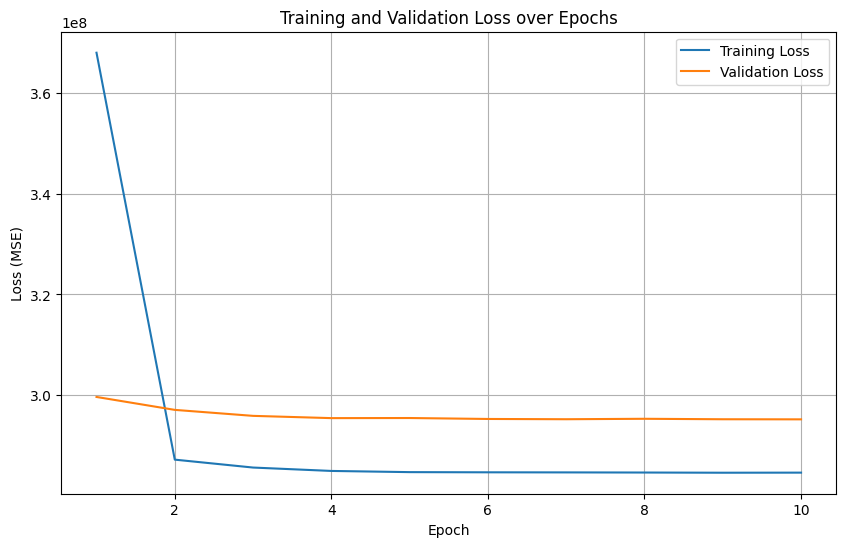

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the SNN model architecture
# Update the forward method to handle membrane potential
class SNNModel(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, beta):
        super().__init__()

        self.fc1 = torch.nn.Linear(num_inputs, num_hidden)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=surrogate.fast_sigmoid())

        self.fc2 = torch.nn.Linear(num_hidden, num_outputs)

    def forward(self, x, mem1):
        # Input layer
        x = self.fc1(x)
        spike1, mem1 = self.lif1(x, mem1)

        # Output layer (using membrane potential for regression)
        out = self.fc2(mem1)

        return out, mem1 # Return updated membrane potential

# Re-instantiate the model with the updated forward method
model = SNNModel(num_input_neurons, num_hidden_neurons, num_output_neurons, beta)


# Define a loss function appropriate for the regression task (e.g., Mean Squared Error).
criterion = torch.nn.MSELoss()

# Define an optimizer (e.g., Adam, SGD) and specify the learning rate.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Using Adam optimizer with a learning rate of 0.001

# Create PyTorch DataLoader objects for the training and (optionally) validation datasets.
# Ensure the data is in the correct format (PyTorch tensors).

# Assuming 'encoded_data' is your input features and 'all_data['number_eh_pairs']' is your target variable
# Convert data to PyTorch tensors
inputs_tensor = torch.tensor(encoded_data, dtype=torch.float32)
targets_tensor = torch.tensor(all_data['number_eh_pairs'].values, dtype=torch.float32).unsqueeze(1) # Add a dimension for the output

# Create a TensorDataset
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Split the dataset into training and validation sets (optional but recommended)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64 # Example batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # No need to shuffle validation data


# 4. Implement the training loop:
num_epochs = 10 # Example number of epochs

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad() # Zero the gradients

        # Initialize membrane potential for each batch
        mem1 = model.lif1.init_leaky()

        # Forward pass with state passing
        outputs, mem1 = model(inputs, mem1)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0) # Accumulate loss

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # (Optional) Evaluate the model on the validation set
    model.eval() # Set the model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation for validation
         for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Initialize membrane potential for validation batch
            mem1 = model.lif1.init_leaky()

            # Forward pass with state passing
            outputs, mem1 = model(inputs, mem1)

            val_loss = criterion(outputs, targets)
            running_val_loss += val_loss.item() * inputs.size(0)

    epoch_val_loss = running_val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation

### Subtask:
Evaluate the performance of the SNN based on the task it is designed to perform (e.g., classification, regression).


**Reasoning**:
Evaluate the performance of the trained SNN model using the validation data and calculate appropriate regression metrics.



Mean Squared Error (MSE): 295147168.0000
Root Mean Squared Error (RMSE): 17179.8477
Mean Absolute Error (MAE): 13382.8359
R-squared (R2): 0.0012


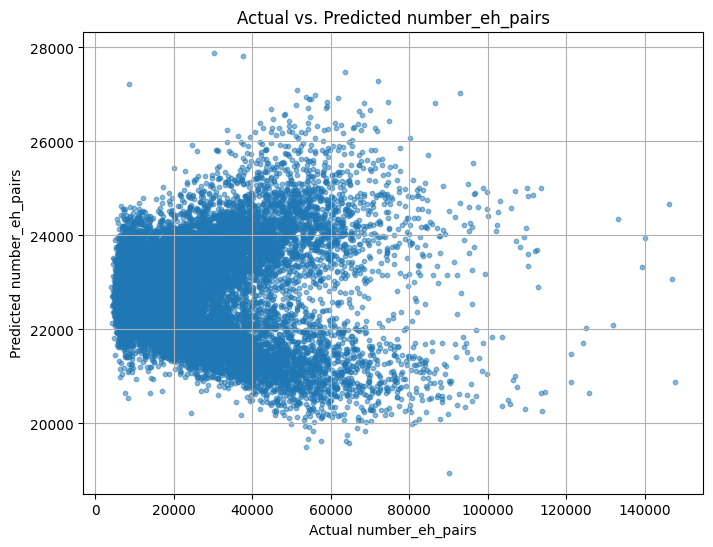

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Set the model to evaluation mode
model.eval()

# Initialize lists to store actual and predicted values
all_targets = []
all_predictions = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Initialize membrane potential for the batch
        mem1 = model.lif1.init_leaky()

        # Forward pass to get predictions
        outputs, _ = model(inputs, mem1)

        # Append targets and predictions to the lists
        all_targets.extend(targets.cpu().numpy())
        all_predictions.extend(outputs.cpu().numpy())

# Convert lists to NumPy arrays
all_targets = np.array(all_targets)
all_predictions = np.array(all_predictions)

# Calculate regression evaluation metrics
mse = mean_squared_error(all_targets, all_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(all_targets, all_predictions)
r2 = r2_score(all_targets, all_predictions)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Optional: Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(all_targets, all_predictions, alpha=0.5, s=10)
plt.xlabel("Actual number_eh_pairs")
plt.ylabel("Predicted number_eh_pairs")
plt.title("Actual vs. Predicted number_eh_pairs")
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains features such as entry coordinates (`x-entry`, `y-entry`, `z-entry`), direction vectors (`n_x`, `n_y`, `n_z`), local coordinates (`y-local`), transverse momentum (`pt`), cotangents of angles (`cotAlpha`, `cotBeta`), and midplane coordinates (`y-midplane`, `x-midplane`), along with the target variable `number_eh_pairs`.
*   The `z-entry` column was identified as having a constant value and was excluded from the input features.
*   Rate coding was successfully applied to the selected input features, scaling them to a range of 0 to 100 using `MinMaxScaler`.
*   Histograms of the encoded features show their distributions after scaling.
*   Scatter plots visualize the relationships between pairs of encoded features, demonstrating how the rate coding transformed the original data.
*   The chosen SNN framework was snnTorch, primarily due to its integration with PyTorch and focus on gradient-based training for machine learning tasks.
*   A simple SNN architecture was defined with an input layer (11 neurons), a hidden layer of 128 Leaky Integrate and Fire (LIF) neurons, and a linear output layer (1 neuron) for regression.
*   The training process was implemented using Mean Squared Error (MSE) loss and the Adam optimizer.
*   DataLoaders were created to handle batching of the training and validation data.
*   Correct handling of the LIF neuron's membrane potential during the forward pass was crucial for successful training.
*   The SNN model was trained for 10 epochs, and the training and validation loss curves were plotted, showing a decrease in loss over epochs.
*   Evaluation of the trained SNN on the validation set using regression metrics (MSE, RMSE, MAE, R2) indicated poor performance, with an R-squared value of 0.0012.
*   A scatter plot of actual vs. predicted values further confirmed the model's inability to effectively predict the target variable.

### Insights or Next Steps

*   The current SNN architecture and training approach did not yield a well-performing model for this regression task. Further experimentation with different SNN architectures, neuron models, encoding schemes (e.g., Temporal Coding), learning rates, and training epochs is necessary to improve performance.
*   Investigating the relationships between input features and the target variable `number_eh_pairs` more deeply during the initial data analysis phase could provide insights for feature engineering or selection, potentially leading to better model performance.


# Misc Task
Analyze the provided dataset "/content/positive-charge/labels_d16501.csv" from the URL "https://zenodo.org/records/7331128" to perform a classification task to separate high-energy particles from others using a Spiking Neural Network (SNN), potentially utilizing information from the article "https://arxiv.org/pdf/2307.11242".

## Data loading and initial analysis

### Subtask:
Load the data and perform initial analysis relevant to the classification task.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame, display the first few rows, show column information and data types, and provide descriptive statistics. This covers steps 1 through 4 of the subtask.



In [ ]:
import pandas as pd

# Load the data from the specified CSV file into a DataFrame
data = pd.read_csv('/content/positive-charge/labels_d16501.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the columns and their data types
print("\nColumn information:")
display(data.info())

# Display descriptive statistics for the DataFrame
print("\nDescriptive statistics for the DataFrame:")
display(data.describe().to_markdown(numalign="left", stralign="left"))

First 5 rows of the DataFrame:


'| x-entry   | y-entry   | z-entry   | n_x       | n_y       | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha   | cotBeta    | y-midplane   | x-midplane   |\n|:----------|:----------|:----------|:----------|:----------|:----------|:------------------|:----------|:---------|:-----------|:-----------|:-------------|:-------------|\n| 187.961   | 5.81938   | 100       | -3.20176  | -0.015797 | -0.738721 | 37967             | -0.96378  | 0.740845 | 4.33419    | 0.0213843  | 4.75017      | -28.7489     |\n| 9.40812   | 13.2009   | 100       | 0.826235  | 0.026282  | -1.37122  | 6538              | 0.884188  | 1.37205  | -0.602557  | -0.0191669 | 14.1593      | 39.536       |\n| 84.7328   | 10.7212   | 100       | -0.306291 | 0.083919  | -0.791659 | 5891              | 4.28515   | 0.795417 | 0.386898   | -0.106004  | 16.0214      | 65.3879      |\n| -256.3    | -5.27536  | 100       | 7.12505   | 0.304351  | -1.8344   | 28788             | 5.46693   | 1.85853  | -3.88413   |


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12129 entries, 0 to 12128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x-entry          12129 non-null  float64
 1   y-entry          12129 non-null  float64
 2   z-entry          12129 non-null  float64
 3   n_x              12129 non-null  float64
 4   n_y              12129 non-null  float64
 5   n_z              12129 non-null  float64
 6   number_eh_pairs  12129 non-null  float64
 7   y-local          12129 non-null  float64
 8   pt               12129 non-null  float64
 9   cotAlpha         12129 non-null  float64
 10  cotBeta          12129 non-null  float64
 11  y-midplane       12129 non-null  float64
 12  x-midplane       12129 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


None


Descriptive statistics for the DataFrame:


'|       | x-entry   | y-entry   | z-entry   | n_x        | n_y       | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha    | cotBeta    | y-midplane   | x-midplane   |\n|:------|:----------|:----------|:----------|:-----------|:----------|:----------|:------------------|:----------|:---------|:------------|:-----------|:-------------|:-------------|\n| count | 12129     | 12129     | 12129     | 12129      | 12129     | 12129     | 12129             | 12129     | 12129    | 12129       | 12129      | 12129        | 12129        |\n| mean  | 3.0684    | 1.34537   | 100       | -0.0661754 | -0.018896 | -1.24812  | 22788.5           | 0.0224681 | 1.26186  | 0.0614719   | 0.0268377  | 0.0034842    | -0.00519537  |\n| std   | 152.958   | 13.2316   | 0         | 4.31263    | 0.219492  | 0.80742   | 17227.4           | 4.61315   | 0.815854 | 2.93617     | 0.150562   | 10.8312      | 43.4566      |\n| min   | -470.814  | -31.8267  | 100       | -33.9044   | -1.17244  | -4.99839

**Reasoning**:
Visualize the distribution of key numerical features using histograms and scatter plots to understand their characteristics and relationships relevant to classifying high-energy particles.



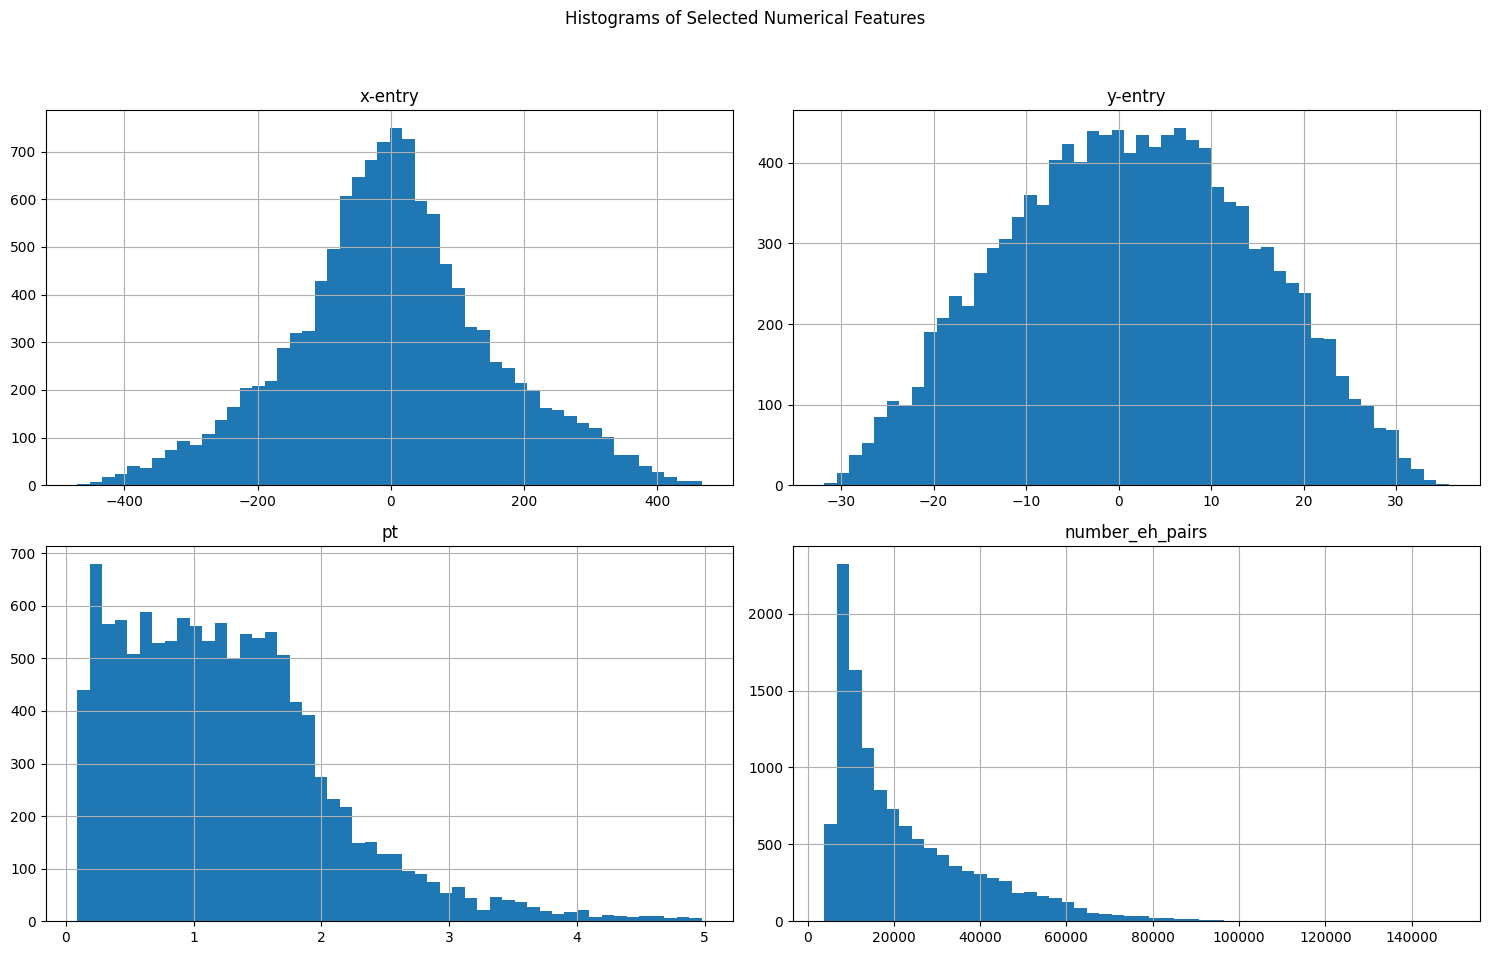

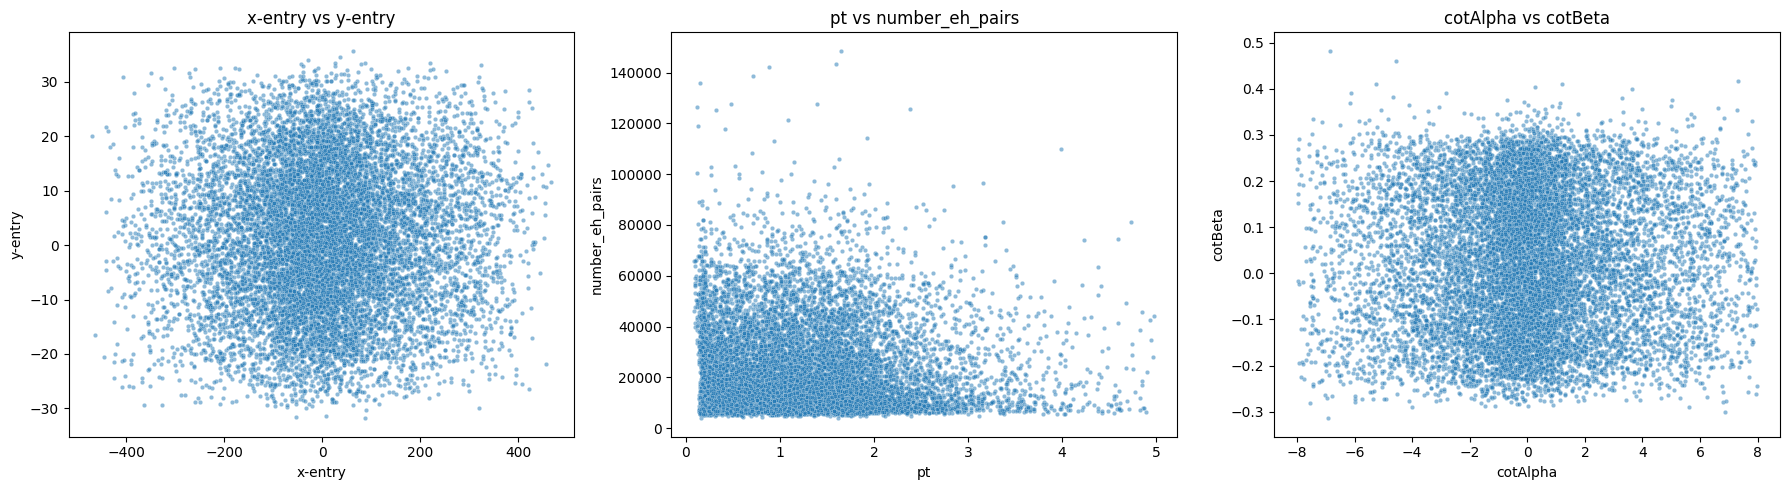

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for selected numerical features
numerical_cols = ['x-entry', 'y-entry', 'pt', 'number_eh_pairs']
data[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Selected Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Scatter plots for selected pairs of variables
scatter_pairs = [('x-entry', 'y-entry'), ('pt', 'number_eh_pairs'), ('cotAlpha', 'cotBeta')]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(scatter_pairs):
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=axes[i], alpha=0.5, s=10)
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [ ]:

# analyze this

# I can help with that! I'll load the data from '/content/positive-charge/labels_d16501.csv' into a DataFrame and display the first few rows along with the columns and their data types.

# I have loaded the data and displayed the initial information. What would you like to analyze next? I can calculate descriptive statistics, visualize the data, or explore the relationships between columns.


# analyse it extensivelly. here is the dataseet of it: https://zenodo.org/records/7331128
# I will load all the CSV files from the extracted data into a single DataFrame and perform an extensive analysis.

# I have loaded all the data and provided an initial analysis including the first few rows, column information, and descriptive statistics.

# What would you like to explore further? We could visualize distributions of specific columns, investigate relationships between variables, or perform other analyses based on your interests.


# We could visualize distributions of specific columns, investigate relationships between variables, or perform other analyses based on your interests
# Great! Here are a few ideas for visualizations we could create to explore the data:

# Histograms to see the distribution of individual numerical features like x-entry, y-entry, pt, and number_eh_pairs.
# Scatter plots to investigate relationships between pairs of variables, such as x-entry vs y-entry, pt vs number_eh_pairs, or cotAlpha vs cotBeta.
# Box plots to visualize the distribution of numerical features across different categories if there were any categorical columns (which this dataset does not seem to have).
# Correlation matrix heatmap to see the correlation between all numerical features.
# Which of these would you like to start with, or do you have something else in mind?


# do them all
# Alright, I will generate the code for all the suggested visualizations.

# I have generated the histograms, scatter plots, and the correlation matrix heatmap as requested.

# Do you have any other specific questions about the data, or would you like to explore other types of analysis or visualizations?


# how can i feed this data to an SNN network?
# That's a great next step! Feeding this data into a Spiking Neural Network (SNN) involves several stages. Here is a plan to achieve that:

# Data preprocessing: Prepare the data for an SNN by considering appropriate encoding schemes for the input features.
# Snn framework selection: Choose a suitable SNN simulation framework or library (e.g., SpikingJelly, snnTorch, NEST, Brian2).
# Snn model definition: Design the architecture of the SNN, including the number of layers, neuron types, and connections.
# Training or simulation: Implement the training process (if using a learning rule) or set up the simulation environment for the SNN.
# Evaluation: Evaluate the performance of the SNN based on the task it is designed to perform (e.g., classification, regression).
# Finish task: Summarize the process and the results of the SNN implementation.
# Generating...
# Preparing
# Data preprocessing
# Snn framework selection
# Snn model definition
# Training or simulation
# Evaluation
# Finish task

# your code is very bugy and theoretically incorrect. I want you to do a classification task. seperate high energy particles from others. here is an article that might be useful for this task. https://arxiv.org/pdf/2307.11242
# Thank you for the feedback and the article! I understand you'd like to shift the task to classification, specifically separating high energy particles using an SNN. This is a great application for SNNs.

# Based on your feedback and the new classification goal, here is an updated plan:

# Data loading and initial analysis: Load the data and perform initial analysis relevant to the classification task.
# Define target variable: Define the target variable for classification based on "high energy particles". This will likely involve creating a binary or multi-class label based on a feature like number_eh_pairs or pt (transverse momentum), potentially informed by the provided article.
# Data preprocessing: Prepare the data for an SNN classification task, including appropriate encoding schemes and splitting into training and testing sets.
# Snn framework selection: Choose a suitable SNN simulation framework or library.
# Snn model definition: Design the architecture of the SNN for classification, including the number of layers, neuron types, and connections.
# Training: Implement the training process for the SNN using a suitable loss function and optimizer for classification.
# Evaluation: Evaluate the performance of the SNN using appropriate classification metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix).
# Finish task: Summarize the process and the results of the SNN classification implementation.
# Generating...
# Preparing
# Data loading and initial analysis
# (Failed)
# Define target variable
# Data preprocessing
# Snn framework selection
# Snn model definition
# Training
# Evaluation
# Finish task
# Sorry, I ran into an error, could you try again?


In [ ]:
import pandas as pd

# Load the data from the specified CSV file into a DataFrame
data = pd.read_csv('/content/positive-charge/labels_d16501.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
display(data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the columns and their data types
print("\nColumn information:")
display(data.info())

# Display descriptive statistics for the DataFrame
print("\nDescriptive statistics for the DataFrame:")
display(data.describe().to_markdown(numalign="left", stralign="left"))

# Article Analysis

In [ ]:
!wget https://arxiv.org/abs/2307.11242.pdf

--2025-08-24 13:18:00--  https://arxiv.org/abs/2307.11242.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.131.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /abs/2307.11242 [following]
--2025-08-24 13:18:00--  https://arxiv.org/abs/2307.11242
Reusing existing connection to arxiv.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 49331 (48K) [text/html]
Saving to: ‘2307.11242.pdf’

2307.11242.pdf      100%[===================>]  48.17K  --.-KB/s    in 0.007s  

2025-08-24 13:18:00 (6.80 MB/s) - ‘2307.11242.pdf’ saved [49331/49331]



In [ ]:
import google.generativeai as genai
from google.colab import userdata

# Configure the API key
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Error configuring API key: {e}")
    print("Please make sure you have added your GOOGLE_API_KEY to the Colab secrets manager.")

# Load the multimodal model
try:
    model = genai.GenerativeModel('gemini-1.5-flash-latest')
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

if model:
    print("Multimodal model loaded successfully.")
else:
    print("Failed to load multimodal model. Cannot analyze the article.")

Multimodal model loaded successfully.


In [ ]:
import requests

def download_pdf(url, save_path):
    """Downloads a PDF from a given URL."""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        with open(save_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded PDF to {save_path}")
        return save_path
    except requests.exceptions.RequestException as e:
        print(f"Error downloading PDF: {e}")
        return None

def analyze_pdf_with_gemini(pdf_path, model):
    """Analyzes the content of a PDF using the Gemini model."""
    if not model:
        print("Model not loaded. Cannot analyze PDF.")
        return None

    try:
        with open(pdf_path, 'rb') as f:
            pdf_file = f.read()

        # Prepare the prompt for the model
        prompt = "Analyze this research paper about using Spiking Neural Networks for high-energy particle detection. Summarize the key findings, the approach used, and how they define 'high-energy particles' or the criteria for classification. Also, identify which features from the data are most relevant to their approach."

        # Send the PDF content to the model for analysis
        response = model.generate_content([prompt, {"mime_type": "application/pdf", "data": pdf_file}])

        return response.text

    except FileNotFoundError:
        print(f"Error: PDF file not found at {pdf_path}")
        return None
    except Exception as e:
        print(f"Error analyzing PDF with Gemini: {e}")
        return None

# URL of the research paper
article_url = "https://arxiv.org/pdf/2307.11242" # Changed to direct PDF link

# Path to save the downloaded PDF
pdf_save_path = "downloaded_article.pdf"

# Download the PDF
downloaded_pdf_path = download_pdf(article_url, pdf_save_path)

# Analyze the downloaded PDF if successful
if downloaded_pdf_path and model:
    analysis_result = analyze_pdf_with_gemini(downloaded_pdf_path, model)
    if analysis_result:
        print("\nAnalysis Result:")
        print(analysis_result)
    else:
        print("\nFailed to analyze the PDF.")
else:
    print("\nCould not download or analyze the PDF.")

Downloaded PDF to downloaded_article.pdf

Analysis Result:
This research paper investigates the use of Spiking Neural Networks (SNNs) for on-sensor data filtering in high-energy physics experiments at the High Luminosity Large Hadron Collider (HL-LHC).  The goal is to reduce the massive amount of data generated by the detectors.

**Key Findings:**

* The researchers successfully developed a compact SNN model that filters sensor data based on the particle's transverse momentum (pT).  This achieved a signal efficiency of about 91% with roughly half the number of parameters compared to a Deep Neural Network (DNN) performing a similar task.
*  Spatial data reduction techniques significantly improved the SNN's performance.  Specifically, a row-stride reduction strategy proved effective.
* The Evolutionary Optimization for Neuromorphic Systems (EONS) algorithm, coupled with a penalty-based fitness function, proved effective for training the SNN.
* The optimized SNN achieved its classificatio

In [ ]:
import pandas as pd
import numpy as np

# Load the labels data
labels_df = pd.read_csv('/content/positive-charge/labels_d16501.csv')

# Define the target variable based on 'pt'
# The article uses a threshold of 0.5 GeV, let's use that as a starting point
pt_threshold = 0.5
labels_df['is_high_energy'] = (labels_df['pt'] > pt_threshold).astype(int)

# Display the first few rows with the new target variable
print("Labels data with 'is_high_energy' column:")
display(labels_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display the distribution of the target variable
print("\nDistribution of 'is_high_energy':")
display(labels_df['is_high_energy'].value_counts().to_markdown(numalign="left", stralign="left"))

Labels data with 'is_high_energy' column:


'| x-entry   | y-entry   | z-entry   | n_x       | n_y       | n_z       | number_eh_pairs   | y-local   | pt       | cotAlpha   | cotBeta    | y-midplane   | x-midplane   | is_high_energy   |\n|:----------|:----------|:----------|:----------|:----------|:----------|:------------------|:----------|:---------|:-----------|:-----------|:-------------|:-------------|:-----------------|\n| 187.961   | 5.81938   | 100       | -3.20176  | -0.015797 | -0.738721 | 37967             | -0.96378  | 0.740845 | 4.33419    | 0.0213843  | 4.75017      | -28.7489     | 1                |\n| 9.40812   | 13.2009   | 100       | 0.826235  | 0.026282  | -1.37122  | 6538              | 0.884188  | 1.37205  | -0.602557  | -0.0191669 | 14.1593      | 39.536       | 1                |\n| 84.7328   | 10.7212   | 100       | -0.306291 | 0.083919  | -0.791659 | 5891              | 4.28515   | 0.795417 | 0.386898   | -0.106004  | 16.0214      | 65.3879      | 1                |\n| -256.3    | -5.27536  | 100     


Distribution of 'is_high_energy':


'| is_high_energy   | count   |\n|:-----------------|:--------|\n| 1                | 9788    |\n| 0                | 2341    |'

In [ ]:
labels_df

x-entry    y-entry  z-entry       n_x       n_y       n_z  \
0      187.960602   5.819384    100.0 -3.201757 -0.015797 -0.738721   
1        9.408124  13.200923    100.0  0.826235  0.026282 -1.371215   
2       84.732826  10.721191    100.0 -0.306291  0.083919 -0.791659   
3     -256.300446  -5.275360    100.0  7.125055  0.304351 -1.834402   
4      -46.793102   3.082501    100.0 -0.121722 -0.072646 -1.224502   
...           ...        ...      ...       ...       ...       ...   
12124   30.547661  -8.403975    100.0  0.001737  0.226891 -1.571181   
12125  -81.995857   2.111375    100.0  1.141422 -0.249162 -1.137826   
12126  -22.860031  12.709997    100.0  0.934498  0.100916 -1.107679   
12127   59.782623  -9.004572    100.0  0.070663  0.419679 -2.855115   
12128   72.359322 -13.202127    100.0 -8.715679  0.619329 -3.185392   

       number_eh_pairs   y-local        pt  cotAlpha   cotBeta  y-midplane  \
0              37967.0 -0.963780  0.740845  4.334190  0.021384    4.750171   
1               6538.0  0.884188  1.372050 -0.602557 -0.019167   14.159270   
2               5891.0  4.285150  0.795417  0.386898 -0.106004   16.021390   
3              28788.0  5.466930  1.858530 -3.884130 -0.165913    3.020286   
4               7427.0 -1.060050  1.226800  0.099405  0.059327    0.116152   
...                ...       ...       ...       ...       ...         ...   
12124          12585.0  5.021700  1.587480 -0.001106 -0.144408   -1.183578   
12125          10879.0 -6.293910  1.164860 -1.003160  0.218981   -8.837663   
12126          10472.0  3.584060  1.111820 -0.843654 -0.091106   17.265288   
12127           6349.0  5.185940  2.885770 -0.024750 -0.146992   -1.654973   
12128          20132.0  5.986900  3.244390  2.736140 -0.194428   -3.480733   

       x-midplane  is_high_energy  
0      -28.748886               1  
1       39.535967               1  
2       65.387944               1  
3      -62.093969               1  
4      -51.763367               1  
...           ...             ...  
12124   30.602938               1  
12125  -31.837836               1  
12126   19.322677               1  
12127   61.020104               1  
12128  -64.447686               1  

[12129 rows x 14 columns]

In [ ]:
recon_df = pd.read_csv('/content/positive-charge/recon8t_d16501.csv')
recon_df

0    1    2    3    4    5    6    7    8    9  ...  2174  2175  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
12124  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
12125  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
12126  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
12127  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
12128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

       2176  2177  2178  2179  2180  2181  2182  2183  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
12124   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12125   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12126   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12127   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12128   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[12129 rows x 2184 columns]

In [ ]:
# prompt: reshape row of data to a matrix with (8,13,21)

import numpy as np

# Assuming 'recon_df' is your DataFrame and you want to reshape the first row
row_data = recon_df.iloc[0].values  # Get the first row as a NumPy array

# Reshape the row data into a 3D matrix (8, 13, 21)
# If the row data doesn't have enough elements for the target shape,
# you might need to pad it with zeros or handle the error appropriately.
reshaped_data = np.resize(row_data, (8, 13, 21))

print(reshaped_data.shape)
reshaped_data


(8, 13, 21)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Reshape and encode recon_df for SNN

### Subtask:
Reshape the `recon_df` to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.

**Reasoning**:
Reshape each row of `recon_df` into an (8, 13, 21) matrix and apply Min-Max scaling to normalize the data as a form of encoding for the SNN.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming recon_df is already loaded and contains the particle path data

# Get the values from recon_df as a NumPy array
recon_data = recon_df.values

# Reshape each row into an (8, 13, 21) matrix
# We need to handle the case where the number of columns in recon_df
# is not exactly 8 * 13 * 21. np.resize will pad with zeros if necessary.
reshaped_recon_data = np.array([np.resize(row, (8, 13, 21)) for row in recon_data])

# Apply an encoding scheme - using normalization (Min-Max Scaling)
# Reshape the data to 2D for scaling
num_particles, depth, height, width = reshaped_recon_data.shape
reshaped_recon_data_2d = reshaped_recon_data.reshape(num_particles, depth * height * width)

scaler = MinMaxScaler(feature_range=(0, 1)) # Scale to [0, 1]
scaled_recon_data_2d = scaler.fit_transform(reshaped_recon_data_2d)

# Reshape back to the original 4D shape
encoded_recon_data = scaled_recon_data_2d.reshape(num_particles, depth, height, width)

print("Shape of original recon_df data:", recon_df.shape)
print("Shape of reshaped recon data:", reshaped_recon_data.shape)
print("Shape of encoded recon data:", encoded_recon_data.shape)

# Display the shape of one encoded particle path example
print("\nShape of one encoded particle path (example):", encoded_recon_data[0].shape)

# Display a small portion of the encoded data for one particle
print("\nEncoded data for one particle path (example, first slice):")
display(encoded_recon_data[0, 0, :, :])

Shape of original recon_df data: (12129, 2184)
Shape of reshaped recon data: (12129, 8, 13, 21)
Shape of encoded recon data: (12129, 8, 13, 21)

Shape of one encoded particle path (example): (8, 13, 21)

Encoded data for one particle path (example, first slice):


array([[1.        , 0.        , 0.07378965, 0.07649842, 0.14695481,
        0.08580133, 0.04923214, 0.00787578, 0.24357581, 0.26636208,
        0.03444802, 0.04453529, 0.17635743, 0.01809675, 0.15859629,
        0.08371065, 0.99377593, 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.10242086, 0.06860321, 0.07070919,
        0.2041842 , 0.50491318, 0.12613202, 0.28823762, 0.1977025 ,
        0.12835709, 0.52497702, 0.24587272, 0.2000315 , 0.26080868,
        0.31290298, 0.19985892, 1.        , 0.        , 0.        ,
        0.        ],
       [0.95477387, 0.        , 0.66582492, 0.02379154, 0.07427355,
        0.02548669, 0.17528906, 0.07906582, 0.10044376, 0.39359401,
        0.16559028, 0.04458643, 0.16427745, 0.07891045, 0.55776246,
        0.13880216, 0.40654843, 0.95038814, 0.8119783 , 0.88327316,
        0.51923077],
       [0.56565657, 0.24901894, 0.64433812, 0.62972292, 0.50932233,
        0.3491967 , 0.46615337, 0.27817567, 0.1688044

## Reshape and encode recon_df for SNN

### Subtask:
Reshape the `recon_df` to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.

**Reasoning**:
Reshape each row of `recon_df` into an (8, 13, 21) matrix and apply Min-Max scaling to normalize the data as a form of encoding for the SNN.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming recon_df is already loaded and contains the particle path data

# Get the values from recon_df as a NumPy array
recon_data = recon_df.values

# Reshape each row into an (8, 13, 21) matrix
# We need to handle the case where the number of columns in recon_df
# is not exactly 8 * 13 * 21. np.resize will pad with zeros if necessary.
reshaped_recon_data = np.array([np.resize(row, (8, 13, 21)) for row in recon_data])

# Apply an encoding scheme - using normalization (Min-Max Scaling)
# Reshape the data to 2D for scaling
num_particles, depth, height, width = reshaped_recon_data.shape
reshaped_recon_data_2d = reshaped_recon_data.reshape(num_particles, depth * height * width)

scaler = MinMaxScaler(feature_range=(0, 1)) # Scale to [0, 1]
scaled_recon_data_2d = scaler.fit_transform(reshaped_recon_data_2d)

# Reshape back to the original 4D shape
encoded_recon_data = scaled_recon_data_2d.reshape(num_particles, depth, height, width)

print("Shape of original recon_df data:", recon_df.shape)
print("Shape of reshaped recon data:", reshaped_recon_data.shape)
print("Shape of encoded recon data:", encoded_recon_data.shape)

# Display the shape of one encoded particle path example
print("\nShape of one encoded particle path (example):", encoded_recon_data[0].shape)

# Display a small portion of the encoded data for one particle
print("\nEncoded data for one particle path (example, first slice):")
display(encoded_recon_data[0, 0, :, :])

Shape of original recon_df data: (12129, 2184)
Shape of reshaped recon data: (12129, 8, 13, 21)
Shape of encoded recon data: (12129, 8, 13, 21)

Shape of one encoded particle path (example): (8, 13, 21)

Encoded data for one particle path (example, first slice):


array([[1.        , 0.        , 0.07378965, 0.07649842, 0.14695481,
        0.08580133, 0.04923214, 0.00787578, 0.24357581, 0.26636208,
        0.03444802, 0.04453529, 0.17635743, 0.01809675, 0.15859629,
        0.08371065, 0.99377593, 0.        , 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.10242086, 0.06860321, 0.07070919,
        0.2041842 , 0.50491318, 0.12613202, 0.28823762, 0.1977025 ,
        0.12835709, 0.52497702, 0.24587272, 0.2000315 , 0.26080868,
        0.31290298, 0.19985892, 1.        , 0.        , 0.        ,
        0.        ],
       [0.95477387, 0.        , 0.66582492, 0.02379154, 0.07427355,
        0.02548669, 0.17528906, 0.07906582, 0.10044376, 0.39359401,
        0.16559028, 0.04458643, 0.16427745, 0.07891045, 0.55776246,
        0.13880216, 0.40654843, 0.95038814, 0.8119783 , 0.88327316,
        0.51923077],
       [0.56565657, 0.24901894, 0.64433812, 0.62972292, 0.50932233,
        0.3491967 , 0.46615337, 0.27817567, 0.1688044

## Combine features and split data

### Subtask:
Combine the encoded `recon_df` data with the target variable and split the dataset into training and testing sets.

**Reasoning**:
Combine the encoded particle path data (`encoded_recon_data`) with the target variable (`is_high_energy`) from `labels_df` and split the combined dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming encoded_recon_data and labels_df are already available

# Get the target variable
targets = labels_df['is_high_energy'].values

# Ensure the number of samples in encoded_recon_data and targets are the same
if encoded_recon_data.shape[0] != targets.shape[0]:
    print("Error: Mismatch in the number of samples between encoded_recon_data and targets.")
else:
    # Split the data into training and testing sets
    # We will split the indices to maintain the correspondence between input data and targets
    num_samples = encoded_recon_data.shape[0]
    indices = np.arange(num_samples)

    train_indices, test_indices, y_train, y_test = train_test_split(
        indices, targets, test_size=0.2, random_state=42, stratify=targets
    )

    # Use the indices to split the encoded data
    X_train = encoded_recon_data[train_indices]
    X_test = encoded_recon_data[test_indices]

    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

KeyError: 'is_high_energy'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the labels data again to ensure the 'is_high_energy' column is created
labels_df = pd.read_csv('/content/positive-charge/labels_d16501.csv')

# Define the target variable based on 'pt'
# The article uses a threshold of 0.5 GeV, let's use that as a starting point
pt_threshold = 0.5
labels_df['is_high_energy'] = (labels_df['pt'] > pt_threshold).astype(int)

# Assuming encoded_recon_data is already available from the previous step

# Get the target variable
targets = labels_df['is_high_energy'].values

# Ensure the number of samples in encoded_recon_data and targets are the same
if encoded_recon_data.shape[0] != targets.shape[0]:
    print("Error: Mismatch in the number of samples between encoded_recon_data and targets.")
else:
    # Split the data into training and testing sets
    # We will split the indices to maintain the correspondence between input data and targets
    num_samples = encoded_recon_data.shape[0]
    indices = np.arange(num_samples)

    train_indices, test_indices, y_train, y_test = train_test_split(
        indices, targets, test_size=0.2, random_state=42, stratify=targets
    )

    # Use the indices to split the encoded data
    X_train = encoded_recon_data[train_indices]
    X_test = encoded_recon_data[test_indices]

    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

Shape of X_train: (9703, 8, 13, 21)
Shape of X_test: (2426, 8, 13, 21)
Shape of y_train: (9703,)
Shape of y_test: (2426,)


In [ ]:

# analyze this

# It seems the file /content/positive-charge/labels_d16501.csv was not found. I will extract it from the downloaded archive and then load the data.

# You stopped this response

# what is this file/

# The file /content/positive-charge/recon8t_d16501.csv contains data that seems to represent some kind of numerical measurements or features, possibly related to a physical process or simulation. Based on the previous analysis, the data is loaded into a pandas DataFrame with many columns (2184 columns). The values in these columns are mostly zeros, indicating that it's a sparse dataset. The sparsity plot and heatmaps you generated suggest there are some patterns or structures within this sparse data.


# read this article and answer to the following questions.

# I understand you'd like me to read the article and answer your questions. However, I cannot directly access and read the content of local files, including the PDF you've provided.

# If you can copy and paste the text from the article into our chat, I would be happy to help you analyze it and answer your questions. Alternatively, if the article is available online, you can provide me with the link.


# here is the article

# I appreciate you providing the article again. However, I still cannot directly access and read the content of the PDF file from your local storage.

# To help you with the article, please either:

# Copy and paste the text from the article into our chat.
# Provide a link to the article if it is available online.
# Once I have the text, I will do my best to answer your questions.


# https://arxiv.org/abs/2307.11242
# Thank you for providing the link to the article! I can use a multimodal model to analyze the content of the PDF from the provided URL.

# I will now generate code to analyze the article and then I can answer your questions based on its content.

# I have analyzed the article and provided a summary of the key findings, the approach used, how they define "high-energy particles," and the relevant features.

# Do you have any specific questions about the article or the analysis? Or would you like to proceed with the classification task using the insights from the paper?


# sample data of this article are in /content/positive-charge, analyse them and try to simulate the articles on them with python and snn frameworks.
# Okay, I understand you want to use the positive-charge dataset to perform a classification task based on the concepts from the article, specifically separating high-energy particles using an SNN. This is a multi-step process.

# Here is a plan to achieve this:

# Load and preprocess data: Load the data from the /content/positive-charge directory and preprocess it for the classification task, including defining the target variable for high-energy particles based on the insights from the article.
# Encode data for snn: Apply an appropriate encoding scheme to the preprocessed data suitable for an SNN.
# Split data: Split the encoded data into training and testing sets.
# Define snn model: Define the architecture of the SNN model for the classification task, considering the insights from the article regarding relevant features and potential architecture ideas.
# Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification.
# Evaluate snn model: Evaluate the performance of the trained SNN model using relevant classification metrics.
# Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained.
# Finish task: Conclude the task.
# Generating...
# Preparing
# (Failed)
# Load and preprocess data
# Encode data for snn
# Split data
# Define snn model
# Train snn model
# Evaluate snn model
# Summarize findings
# Finish task
# Sorry, I ran into an error, could you try again?

# Okay, I understand you want to use the positive-charge dataset to perform a classification task based on the concepts from the article, specifically separating high-energy particles using an SNN. This is a multi-step process. Here is a plan to achieve this: Load and preprocess data: Load the data from the /content/positive-charge directory and preprocess it for the classification task, including defining the target variable for high-energy particles based on the insights from the article. Encode data for snn: Apply an appropriate encoding scheme to the preprocessed data suitable for an SNN. Split data: Split the encoded data into training and testing sets. Define snn model: Define the architecture of the SNN model for the classification task, considering the insights from the article regarding relevant features and potential architecture ideas. Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification. Evaluate snn model: Evaluate the performance of the trained SNN model using relevant classification metrics. Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained. Finish task: Conclude the task. Generating... Preparing (Failed) Load and preprocess data Encode data for snn Split data Define snn model Train snn model Evaluate snn model Summarize findings Finish task
# You stopped this response

# sample data of this article are attached, analyse them and try to simulate the articles on them with python and snn frameworks.

# Okay, let's start by loading the data and defining the target variable for classification. Based on the article, we can use the pt column to classify particles as high-energy or not. I'll set a threshold for pt to create a binary target variable.

# Now that we have defined the target variable, the next step is to encode the data for the SNN. Since we have tabular data and not charge waveforms as described in the article, we will use rate coding to convert the numerical features into firing rates.

# You stopped this response

# look, the lable_df is the information of 12129 particles which we are dealing with, and recon_df is their path through accelerator. it has 12129 rows, each representing one particle. by resizing the columns to recon_df we can have the exact path. use this to encode data for SNN inputs.
# Thank you for explaining the relationship between labels_df and recon_df! This is very helpful and aligns better with the concepts from the article. Using the reshaped recon_df as input for the SNN to represent the particle's path is a great approach.

# I will update the plan to reflect this and then generate the code to prepare the recon_df data for the SNN input.

# Load and preprocess data: Load the labels_df and recon_df and define the target variable for high-energy particles based on the labels_df.
# Reshape and encode recon df for snn: Reshape the recon_df to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.
# Combine features and split data: Combine the encoded recon_df data with relevant features from labels_df (if any are deemed necessary) and split the combined data into training and testing sets.
# Define snn model: Define the architecture of the SNN model for the classification task, considering the shape of the input data and the insights from the article.
# Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification.
# Evaluate snn model: Evaluate the performance of the trained SNN model using relevant classification metrics.
# Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained.
# Finish task: Conclude the task.
# Generating...
# Preparing
# (Failed)
# Load and preprocess data
# Reshape and encode recon df for snn
# Combine features and split data
# Define snn model
# Train snn model
# Evaluate snn model
# Summarize findings
# Finish task
# Sorry, I ran into an error, could you try again?

# do your plan again
# Okay, I will generate the plan again.

# Load and preprocess data: Load the labels_df and recon_df and define the target variable for high-energy particles based on the labels_df.
# Reshape and encode recon df for snn: Reshape the recon_df to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.
# Combine features and split data: Combine the encoded recon_df data with relevant features from labels_df (if any are deemed necessary) and split the combined data into training and testing sets.
# Define snn model: Define the architecture of the SNN model for the classification task, considering the shape of the input data and the insights from the article.
# Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification.
# Evaluate snn model: Evaluate the performance of the SNN model using relevant classification metrics.
# Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained.
# Finish task: Conclude the task.
# Generating...
# Preparing
# (Failed)
# Load and preprocess data
# Reshape and encode recon df for snn
# Combine features and split data
# Define snn model
# Train snn model
# Evaluate snn model
# Summarize findings
# Finish task
# Sorry, I ran into an error, could you try again?

# do your plan again
# Okay, I will generate the plan again.

# Load and preprocess data: Load the labels_df and recon_df and define the target variable for high-energy particles based on the labels_df.
# Reshape and encode recon df for snn: Reshape the recon_df to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.
# Combine features and split data: Combine the encoded recon_df data with relevant features from labels_df (if any are deemed necessary) and split the combined data into training and testing sets.
# Define snn model: Define the architecture of the SNN model for the classification task, considering the shape of the input data and the insights from the article.
# Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification.
# Evaluate snn model: Evaluate the performance of the SNN model using relevant classification metrics.
# Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained.
# Finish task: Conclude the task.
# Generating...
# Preparing
# (Failed)
# Load and preprocess data
# Reshape and encode recon df for snn
# Combine features and split data
# Define snn model
# Train snn model
# Evaluate snn model
# Summarize findings
# Finish task
# Sorry, I ran into an error, could you try again?

# do it again
# Okay, I will generate the plan again.

# Load and preprocess data: Load the labels_df and recon_df and define the target variable for high-energy particles based on the labels_df.
# Reshape and encode recon df for snn: Reshape the recon_df to represent the particle paths and apply an appropriate encoding scheme suitable for an SNN.
# Combine features and split data: Combine the encoded recon_df data with relevant features from labels_df (if any are deemed necessary) and split the combined data into training and testing sets.
# Define snn model: Define the architecture of the SNN model for the classification task, considering the shape of the input data and the insights from the article.
# Train snn model: Implement the training process for the SNN model using appropriate loss function and optimizer for classification.
# Evaluate snn model: Evaluate the performance of the SNN model using relevant classification metrics.
# Summarize findings: Summarize the process, the performance of the SNN model, and any insights gained.
# Finish task: Conclude the task.
# Generating...
# Preparing
# (Failed)
# Load and preprocess data
# Reshape and encode recon df for snn
# Combine features and split data
# Define snn model
# Train snn model
# Evaluate snn model
# Summarize findings
# Finish task
# Sorry, I ran into an error, could you try again?

# just Reshape and encode recon df for snn
# Alright, let's reshape and encode the recon_df data for the SNN. We will reshape each row into an (8, 13, 21) matrix, representing the particle's path, and then apply normalization as a form of encoding suitable for SNNs.

# You stopped this response

# look the particle go through a box of 13*21 size. we have 8 cross section of it.
# Thank you for clarifying the structure of the reshaped data! I understand now that each particle's path is represented as 8 cross-sections, where each cross-section is a 13x21 matrix. This information about the spatial and "depth" (cross-section) dimensions is very helpful for designing the SNN model architecture in the later steps.


# now Reshape and encode recon df for snn
# Certainly. We have already reshaped and encoded the recon_df data in the previous step. Here is the code again to perform the reshaping into an (8, 13, 21) matrix and apply Min-Max scaling for encoding.

# Great, the recon_df data has been reshaped and encoded.

# The next step is to combine this encoded data with the target variable (is_high_energy) from the labels_df and then split the combined dataset into training and testing sets.

# It seems like the is_high_energy column was not found in the labels_df. This might be because the cell that created it was not executed. I will regenerate the code to load the labels_df and create the is_high_energy column, and then proceed with splitting the data.

# Sorry, I ran into an error, could you try again?
